Description for which files are where, what is needed

### What you need

This tutorial goes from parsing data to visualizing the posterior of MDSINE2.

The tables that you will need are:
* taxa counts
* qPCR table
* perturbations table
* taxonomy table
* metadata file

Our data is preprocessed in objects from a previous tutorial. For this tutorial we unpacking our data into it's composite tables to walk you through constructing your own `Study` objects


In [76]:
%matplotlib inline

import mdsine2 as md2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import logging

md2.LoggingConfig(level=logging.INFO)

In [77]:
# Make example datasets from preprocessed data
def make_toy(dset):
    to_delete = []
    for taxa in dset.taxas:
        if taxa.idx >= 15:
            to_delete.append(taxa.name)
    dset.pop_taxas(to_delete)
    
    os.makedirs(os.path.join('data',dset.name+'-toy'), exist_ok=True)
    dset.write_metadata_to_csv(path=os.path.join('data',dset.name+'-toy','metadata.tsv'))
    dset.write_qpcr_to_csv(path=os.path.join('data',dset.name+'-toy','qpcr.tsv'))
    if dset.perturbations is not None:
        dset.write_perturbations_to_csv(path=os.path.join('data',dset.name+'-toy','perturbations.tsv'))
    dset.write_reads_to_csv(path=os.path.join('data',dset.name+'-toy','reads.tsv'))
    dset.taxas.write_taxonomy_to_csv(path=os.path.join('data',dset.name+'-toy','taxonomy.tsv'))

In [78]:
healthy = md2.Study.load('../processed_data/gibson_healthy_agg_taxa_filtered.pkl')
uc = md2.Study.load('../processed_data/gibson_uc_agg_taxa_filtered.pkl')
replicates = md2.Study.load('../processed_data/gibson_replicates_agg_taxa_filtered.pkl')

make_toy(dset=healthy)
make_toy(dset=uc)
make_toy(dset=replicates)

### Metadata table
The following table is a metadata table. It tells the `Study` object what subject and timepoint each sample belongs to

In [79]:
# Load metadata table
metadata = pd.read_csv('data/healthy-toy/metadata.tsv', sep='\t')
metadata.head()

,sampleID,subject,time
0,2-D10,2,10.0
1,2-D11,2,11.0
2,2-D14,2,14.0
3,2-D16,2,16.0
4,2-D18,2,18.0


### qPCR table
The following table is a qPCR table. This has the replicate measurements of the qPCR for every sample.

In [80]:
# qPCR table
qpcr = pd.read_csv('data/healthy-toy/qpcr.tsv', sep='\t')
qpcr.head()

,sampleID,measurement1,measurement2,measurement3
0,2-D10,4.129004e+10,6.423568e+10,8.384557e+10
1,2-D11,2.981363e+10,6.587538e+10,5.077812e+10
2,2-D14,1.647771e+10,7.104907e+10,2.498869e+10
3,2-D16,3.666487e+10,6.237899e+10,3.875999e+10
4,2-D18,4.523257e+10,2.320504e+10,2.330249e+10


### Perturbation table
The following table is a perturbation table. This tells the `Study` object which subject has a perturbation and when. There can be multiple perturbations for each subject. Note that this is only necessary if you have perturbations in your dataset.

In [81]:
perturbations = pd.read_csv('data/healthy-toy/perturbations.tsv', sep='\t')
perturbations

,name,start,end,subject
0,High Fat Diet,21.5,28.5,2
1,High Fat Diet,21.5,28.5,3
2,High Fat Diet,21.5,28.5,4
3,High Fat Diet,21.5,28.5,5
4,Vancomycin,35.5,42.5,2
5,Vancomycin,35.5,42.5,3
6,Vancomycin,35.5,42.5,4
7,Vancomycin,35.5,42.5,5
8,Gentamicin,50.5,57.5,2
9,Gentamicin,50.5,57.5,3


### Reads table
The following table is a reads table. This shows the number of counts each taxa has for each sample ID.

In [28]:
reads = pd.read_csv('data/healthy-toy/reads.tsv', sep='\t')
reads.head()

,name,2-D10,2-D11,2-D14,2-D16,2-D18,2-D1AM,2-D1PM,2-D21AM,2-D21PM,2-D22AM,2-D22PM,2-D23AM,2-D23PM,2-D24,2-D25,2-D28AM,2-D28PM,2-D29AM,2-D29PM,2-D2AM,2-D2PM,2-D30AM,2-D30PM,2-D31AM,2-D31PM,2-D32,2-D33,2-D35AM,2-D35PM,2-D36AM,2-D36PM,2-D37AM,2-D37PM,2-D38,2-D39,2-D3AM,2-D3PM,2-D42AM,2-D42PM,2-D43AM,2-D43PM,2-D44AM,2-D44PM,2-D45AM,2-D45PM,2-D46,2-D47,2-D4AM,2-D4PM,2-D5,2-D50AM,2-D50PM,2-D51AM,2-D51PM,2-D52AM,2-D52PM,2-D53,2-D54,2-D57AM,2-D57PM,2-D58AM,2-D58PM,2-D59AM,2-D59PM,2-D6,2-D60AM,2-D60PM,2-D61,2-D62,2-D63,2-D64AM,2-D64PM,2-D7,2-D8,2-D9,3-D10,3-D11,3-D14,3-D16,3-D18,3-D1AM,3-D1PM,3-D21AM,3-D21PM,3-D22AM,3-D22PM,3-D23AM,3-D23PM,3-D24,3-D25,3-D28AM,3-D29AM,3-D29PM,3-D2AM,3-D2PM,3-D30AM,3-D30PM,3-D31AM,3-D31PM,3-D32,3-D33,3-D35AM,3-D35PM,3-D36AM,3-D36PM,3-D37AM,3-D38,3-D39,3-D3AM,3-D3PM,3-D42AM,3-D42PM,3-D43AM,3-D43PM,3-D44AM,3-D44PM,3-D45AM,3-D45PM,3-D46,3-D47,3-D4AM,3-D4PM,3-D5,3-D50AM,3-D50PM,3-D51AM,3-D51PM,3-D52AM,3-D52PM,3-D53,3-D54,3-D57AM,3-D57PM,3-D58AM,3-D58PM,3-D59AM,3-D59PM,3-D6,3-D60AM,3-D60PM,3-D61,3-D62,3-D63,3-D64AM,3-D64PM,3-D7,3-D8,3-D9,4-D10,4-D11,4-D14,4-D16,4-D18,4-D1AM,4-D1PM,4-D21AM,4-D21PM,4-D22AM,4-D22PM,4-D23AM,4-D23PM,4-D24,4-D25,4-D28AM,4-D29AM,4-D29PM,4-D2AM,4-D2PM,4-D30AM,4-D30PM,4-D31AM,4-D31PM,4-D32,4-D33,4-D35AM,4-D35PM,4-D36AM,4-D36PM,4-D37AM,4-D37PM,4-D38,4-D39,4-D3AM,4-D3PM,4-D42AM,4-D42PM,4-D43AM,4-D43PM,4-D44AM,4-D44PM,4-D45AM,4-D45PM,4-D46,4-D47,4-D4AM,4-D4PM,4-D5,4-D50AM,4-D50PM,4-D51AM,4-D51PM,4-D52AM,4-D52PM,4-D53,4-D54,4-D57AM,4-D57PM,4-D58AM,4-D58PM,4-D59AM,4-D59PM,4-D6,4-D60AM,4-D60PM,4-D61,4-D62,4-D63,4-D64AM,4-D64PM,4-D7,4-D8,4-D9,5-D10,5-D11,5-D14,5-D16,5-D18,5-D1AM,5-D1PM,5-D21AM,5-D21PM,5-D22AM,5-D22PM,5-D23AM,5-D23PM,5-D24,5-D25,5-D28AM,5-D28PM,5-D29AM,5-D29PM,5-D2AM,5-D2PM,5-D30AM,5-D30PM,5-D31AM,5-D31PM,5-D32,5-D33,5-D35AM,5-D35PM,5-D36AM,5-D36PM,5-D37AM,5-D37PM,5-D38,5-D39,5-D3AM,5-D3PM,5-D42AM,5-D42PM,5-D43AM,5-D43PM,5-D44AM,5-D44PM,5-D45AM,5-D45PM,5-D46,5-D47,5-D4AM,5-D4PM,5-D5,5-D50AM,5-D50PM,5-D51AM,5-D51PM,5-D52AM,5-D52PM,5-D53,5-D54,5-D57AM,5-D57PM,5-D58AM,5-D58PM,5-D59AM,5-D59PM,5-D6,5-D60AM,5-D60PM,5-D61,5-D62,5-D63,5-D64AM,5-D64PM,5-D7,5-D8,5-D9
0,OTU_1,1227,1793,8023,9503,3243,1830,199,3539,5270,3866,3899,1984,807,2299,1349,1074,855,3479,3910,489,1056,5113,5624,7096,5788,10237,2784,2711,2421,1554,1216,259,154,114,100,1474,3227,1963,2950,126,202,207,222,89,50,185,180,7637,4237,5597,53,47,29,48,162,37,188,2349,5520,3265,3892,3881,1646,1805,6129,1913,6688,1730,1269,651,987,853,9591,2503,234,6265,6822,1831,2874,6154,235,202,7102,7624,6024,3889,4683,5921,3608,4278,2865,5330,7488,340,227,7926,5061,5108,4923,4988,5879,4039,4822,3009,4213,609,197,123,1398,1945,1365,1652,4512,741,455,461,99,54,386,134,4408,4276,2734,124,209,55,80,249,107,341,109,168,194,713,637,539,564,3804,806,891,833,775,545,525,845,4798,4650,5987,398,1744,11041,9437,9948,4695,195,5562,3920,1638,1210,1235,639,929,1277,4084,5681,6144,222,176,4690,3737,5519,5504,3350,6638,3696,3697,1529,2179,3757,1466,182,96,183,461,8678,7682,5384,2311,1032,1101,263,153,426,167,1900,2509,3240,157,182,71,59,267,154,133,109,116,36,122,90,20,13,6844,125,63,96,63,51,34,76,5459,3853,585,5152,4173,11816,5113,5642,5033,230,6454,5745,4194,7218,8262,1512,2093,3224,2091,1650,3840,11932,620,852,8741,5593,6152,3740,500,307,52,77,99,95,182,135,135,123,1198,3491,395,38,60,35,96,136,38,27,137,162,3943,5485,5746,49,103,39,80,222,205,115,29,73,135,140,223,83,192,6401,218,409,2072,1160,723,1043,1732,4698,3310,4495
1,OTU_2,17362,6887,17165,29854,36759,2929,9880,15863,20619,2725,1792,466,51,86,38,25,34,1317,2217,24422,17184,5490,5924,6906,7466,9783,7856,10490,9939,18164,17769,16694,8553,8842,5806,11193,15984,8567,6995,5108,6693,5785,6963,5880,6755,8239,7199,21915,13035,15798,625,751,2368,2556,632,206,278,177,644,1857,5473,5433,2847,2693,14811,2652,8942,3765,4053,2497,4608,4569,12926,8541,12646,11800,14693,20597,10165,19883,8032,19079,24905,21860,2601,1059,309,152,130,124,46,1130,3653,23489,17698,9339,7694,7429,8762,9965,15319,9470,13328,1292

### Taxonomy table
The following table is a taxonomy table. For each taxa name, it shows the sequence and taxonomy

In [29]:
taxonomy = pd.read_csv('data/healthy-toy/taxonomy.tsv', sep='\t')
taxonomy

,name,sequence,kingdom,phylum,class,order,family,genus,species
0,OTU_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,NaN
1,OTU_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
2,OTU_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
3,OTU_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
4,OTU_5,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella,excrementihominis
5,OTU_6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/dorei
6,OTU_7,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,caccae
7,OTU_8,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,salyersiae
8,OTU_9,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
9,OTU_10,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,uniformis


With these 5 tables, you can run our model. You can parse them directly into a `Study` object with the `mdsine2.dataset.parse` command:

In [30]:
h_toy = md2.dataset.parse(name='healthy-toy-dataset', 
                         taxonomy='data/healthy-toy/taxonomy.tsv', 
                         reads='data/healthy-toy/reads.tsv', 
                         qpcr='data/healthy-toy/qpcr.tsv', 
                         perturbations='data/healthy-toy/perturbations.tsv', 
                         metadata='data/healthy-toy/metadata.tsv')
uc_toy = md2.dataset.parse(name='uc-toy-dataset', 
                         taxonomy='data/uc-toy/taxonomy.tsv', 
                         reads='data/uc-toy/reads.tsv', 
                         qpcr='data/uc-toy/qpcr.tsv', 
                         perturbations='data/uc-toy/perturbations.tsv', 
                         metadata='data/uc-toy/metadata.tsv')
rep_toy = md2.dataset.parse(name='replicates-toy-dataset', 
                         taxonomy='data/replicates-toy/taxonomy.tsv', 
                         reads='data/replicates-toy/reads.tsv', 
                         qpcr='data/replicates-toy/qpcr.tsv', 
                         metadata='data/replicates-toy/metadata.tsv')


INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting


          measurement1  measurement2  measurement3
sampleID                                          
2-D10     4.129004e+10  6.423568e+10  8.384557e+10
2-D11     2.981363e+10  6.587538e+10  5.077812e+10
2-D14     1.647771e+10  7.104907e+10  2.498869e+10
2-D16     3.666487e+10  6.237899e+10  3.875999e+10
2-D18     4.523257e+10  2.320504e+10  2.330249e+10
...                ...           ...           ...
5-D64AM   6.186436e+10  1.176180e+11  1.133922e+11
5-D64PM   5.640167e+10  1.124173e+11  1.155695e+11
5-D7      5.851029e+10  7.881031e+10  3.539782e+10
5-D8      2.451619e+10  5.473670e+10  5.284428e+10
5-D9      5.088652e+10  6.413902e+10  6.621718e+10

[297 rows x 3 columns]
          measurement1  measurement2  measurement3
sampleID                                          
10-D10    1.249714e+11  1.476571e+11  5.866129e+10
10-D11    1.430439e+11  2.154554e+11  2.931997e+11
10-D14    7.274684e+10  1.950943e+11  6.949483e+10
10-D16    9.364484e+10  1.167788e+11  1.107184e+11
10-D18 

You would just read these in with this parser. These are identical to our precomputed dataset 

# Learning the Negative Binomial dispersion parameters

This corresponds to the script ``

words here

In [31]:
# Description

In [32]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    ckpt=100, basepath='output/negbin/run2')

description

In [33]:
mcmc_negbin = md2.negbin.build_graph(params=params, graph_name=rep_toy.name, 
                              subjset=rep_toy)

INFO:inference.548: Setting Single Write, Multiple Read Mode
INFO:inference.553: Setting the trace of learned parameters
INFO:inference.554: #######################################
INFO:inference.556: Setting the trace of Negative binomial dispersion a0
INFO:inference.556: Setting the trace of Negative binomial dispersion a1
INFO:inference.556: Setting the trace of Filtering
INFO:inference.558: Setting the trace for diagnostic variables
INFO:inference.559: ##########################################


description

In [34]:
mcmc_negbin = md2.negbin.run_graph(mcmc_negbin, crash_if_error=True)

INFO:inference.427: 

Inference iteration 0/200, time: 0.0
INFO:inference.436: Negative binomial dispersion a0: 1e-10
INFO:inference.436: Negative binomial dispersion a1: 0.1
INFO:inference.436: Filtering: NA
INFO:inference.427: 

Inference iteration 1/200, time: 0.008991479873657227
INFO:inference.436: Negative binomial dispersion a0: Value: 9.12347176492168e-11, Acceptance rate: 1.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
INFO:inference.436: Filtering: no-mp : Time: 0.0040, Acc: [0.333, 0.267, 0.533], data/sec: 11325.75
INFO:inference.427: 

Inference iteration 2/200, time: 0.009002208709716797
INFO:inference.436: Negative binomial dispersion a0: Value: 9.12347176492168e-11, Acceptance rate: 0.5
INFO:inference.436: Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
INFO:inference.436: Filtering: no-mp : Time: 0.0050, Acc: [0.467, 0.333, 0.667], data/sec: 8994.65
INFO:inference.427: 

Inference iteration 3/200, time: 0.00899

INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.5238095238095238
INFO:inference.436: Negative binomial dispersion a1: Value: 0.0702435881532771, Acceptance rate: 0.5714285714285714
INFO:inference.436: Filtering: no-mp : Time: 0.0040, Acc: [0.400, 0.400, 0.267], data/sec: 11246.79
INFO:inference.427: 

Inference iteration 22/200, time: 0.0060002803802490234
INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.5
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07518623197685229, Acceptance rate: 0.5909090909090909
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.467], data/sec: 15001.09
INFO:inference.427: 

Inference iteration 23/200, time: 0.006999492645263672
INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.4782608695652174
INFO:inference.436: Negative binomial dispersion a1: Value: 0.08465064

INFO:inference.436: Negative binomial dispersion a1: Value: 0.05972808680826823, Acceptance rate: 0.7560975609756098
INFO:inference.436: Filtering: no-mp : Time: 0.0050, Acc: [0.333, 0.333, 0.467], data/sec: 9000.65
INFO:inference.427: 

Inference iteration 42/200, time: 0.0070002079010009766
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.35714285714285715
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07256198093375534, Acceptance rate: 0.7619047619047619
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.200, 0.467, 0.400], data/sec: 15007.05
INFO:inference.427: 

Inference iteration 43/200, time: 0.005997180938720703
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.3488372093023256
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07256198093375534, Acceptance rate: 0.7441860465116279
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc

INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.16
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06843561847362963, Acceptance rate: 0.72
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.200, 0.333], data/sec: 14996.32
INFO:inference.427: 

Inference iteration 63/200, time: 0.006999015808105469
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.14
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06621845898933494, Acceptance rate: 0.74
INFO:inference.436: Filtering: no-mp : Time: 0.0040, Acc: [0.267, 0.333, 0.467], data/sec: 11244.78
INFO:inference.427: 

Inference iteration 64/200, time: 0.005999088287353516
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.12
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06621845898933494, Acceptance rate: 0.74
INFO:inference.436: Fi

INFO:inference.436: Negative binomial dispersion a1: Value: 0.07077472062567301, Acceptance rate: 0.62
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.467, 0.600], data/sec: 15003.47
INFO:inference.427: 

Inference iteration 84/200, time: 0.00600433349609375
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.06
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07077472062567301, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.533], data/sec: 14882.80
INFO:inference.427: 

Inference iteration 85/200, time: 0.005999088287353516
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.06
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05456268907748136, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.467], data/sec: 15007.05
INFO:inference.427: 

Infere

INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.333, 0.333], data/sec: 15002.28
INFO:inference.427: 

Inference iteration 105/200, time: 0.005998134613037109
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05223443213278448, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.467, 0.200], data/sec: 14986.79
INFO:inference.427: 

Inference iteration 106/200, time: 0.0070040225982666016
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05223443213278448, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.333, 0.533], data/sec: 14986.79
INFO:inference.427: 

Inference iteration 107/200, time: 0.005998373031616211
INFO:inference.436: Negative binomial dispersio

INFO:inference.427: 

Inference iteration 126/200, time: 0.0060002803802490234
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.051348223155991454, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.533, 0.267], data/sec: 14995.13
INFO:inference.427: 

Inference iteration 127/200, time: 0.006995677947998047
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.051348223155991454, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.533, 0.267], data/sec: 15004.66
INFO:inference.427: 

Inference iteration 128/200, time: 0.0059967041015625
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial disp

INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.400, 0.333], data/sec: 15018.99
INFO:inference.427: 

Inference iteration 148/200, time: 0.006999492645263672
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.333, 0.333], data/sec: 14990.36
INFO:inference.427: 

Inference iteration 149/200, time: 0.0060083866119384766
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.56
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.200, 0.400, 0.600], data/sec: 14891.02
INFO:inference.427: 



INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.600, 0.267, 0.333], data/sec: 15013.02
INFO:inference.427: 

Inference iteration 169/200, time: 0.004996538162231445
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.08093076178190899, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.267, 0.400], data/sec: 15002.28
INFO:inference.427: 

Inference iteration 170/200, time: 0.005999565124511719
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.08093076178190899, Acceptance rate: 0.56
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.533, 0.467, 0.600], data/sec: 14996.32
INFO:inference.427: 

Inference iteration 171/200, time: 0.0070340633392333984
INFO:inference.436: Negative binomial dispersion 

INFO:inference.427: 

Inference iteration 190/200, time: 0.0069942474365234375
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.060860136182739916, Acceptance rate: 0.5
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.267, 0.400], data/sec: 15005.86
INFO:inference.427: 

Inference iteration 191/200, time: 0.005998373031616211
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.060860136182739916, Acceptance rate: 0.48
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.600, 0.400, 0.533], data/sec: 15004.66
INFO:inference.427: 

Inference iteration 192/200, time: 0.005995988845825195
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispe

description, we are repeating this on the smaller dataset so you know how to run it and know what it looks like. This is not representative of the real results because we only have the ten most abundant taxa here.

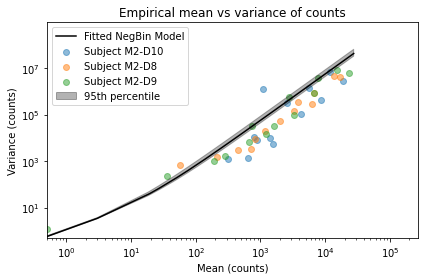

In [35]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin)
fig.tight_layout()

# Run the model

In [64]:
# Get a0 and a1 from negbin (get the mean of the posterior)
from mdsine2.names import STRNAMES
a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

print('negbin a0', a0)
print('negbin a1', a1)

basepath = 'output/mdsine2/run2'
os.makedirs(basepath, exist_ok=True)


# Initialize parameters of the model
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, data_seed=0, init_seed=0,
    burnin=50, n_samples=100, negbin_a0=a0, 
    negbin_a1=a1, checkpoint=50)

# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

negbin a0 1.395854781643241e-13
negbin a1 0.058736213888751776


In [65]:
# initilize the graph
mcmc_healthy0 = md2.initialize_graph(params=params, graph_name=h_toy.name, subjset=h_toy)


INFO:base.2535: max_value found: 551243918704.4608, scaling_factor: 1.8140789695244354e-10
INFO:run.83: Normalizing abundances for a max value of 100. Normalization constant: 1.8141E-10
INFO:run.250: There are 297 qPCR measurements for 3 buckets. Each bucket is 99 measurements long
INFO:run.285: Initializing Filtering
INFO:posterior.2649: Setting up the essential timepoints
INFO:posterior.2662: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.285: Initializing Zero inflation
INFO:design_matrices.846: Initializing LHS vector
INFO:design_matrices.1011: Initializing growth design matrix
INFO:design_matrices.939: Initializing self-intera

INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Vancomycin
INFO:run.369: 		value: {2136181378912: 0, 2135237655352: 0, 2135237653168: 0, 2135206583152: 0, 2135215970624: 0, 2135274692392: 0, 2135217239432: 0, 2134605287208: 0, 2134605286312: 0, 2135253139408: 0, 2135216052768: 0, 2135216052936: 0, 2135259041976: 0, 2135259043264: 0, 2135259044272: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Gentamicin
INFO:run.369: 		value: {2136181378912: 0, 2135237655352: 0, 2135237653168: 0, 2135206583152: 0, 2135215970624: 0, 2135274692392: 0, 2135217239432: 0, 2134605287208: 0, 2134605286312: 0, 2135253139408: 0, 2135216052768: 0, 2135216052936: 0, 2135259041976: 0, 2135259043264: 0, 2135259044272: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.371: Perturbation prior variances:
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:r

In [66]:
mcmc_healthy0 = md2.run_graph(mcmc_healthy0, crash_if_error=True)

INFO:inference.427: 

Inference iteration 0/100, time: 0.0
INFO:inference.436: Cluster interaction indicator parameter: None
INFO:inference.436: Cluster interaction probability: 0.09234190994988938
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: Nones
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (0/15): [False False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.1527842458791451
	perturbation Vancomycin: 0.1527842458791451
	perturbation Gentamicin: 0.1527842458791451
INFO:inference.436: Logistic growth parameters (growth, se

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.4208311172402146
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -59.800580342626226
	perturbation Vancomycin: 1.4621257104534244
	perturbation Gentamicin: 37.57107696795003
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1, Acceptance rate: 0.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.16720527935224616, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 11.24206478413183
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2427.7695015887994
	perturbation Vancomycin: 450.1179067792684
	perturbation Gentamicin: 1929.49

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False  True False False  True False False False  True False False False False False False False False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False  True False False False False False False False False False False False  True  True False  True False False False  True False False False False  True False False False False False False False  True False False  True False  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False  True False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.00832439492561568
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 43.01776702321259
	perturbation Vancomycin: -261.4596856664191
	perturbation Gentamicin: 48.010578598032225
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4323622883817901, Acceptance rate: 0.75
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.16123722443095062, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.0220303332586187
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 10634.21591743658
	perturbation Vancomycin: 3462.9370582878696
	perturbation 

INFO:inference.427: 

Inference iteration 6/100, time: 0.3437659740447998
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False 

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.4583256452419261
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -143.87773495363538
	perturbation Vancomycin: 43.675083085198644
	perturbation Gentamicin: -36.26947946568807
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6769006917959195, Acceptance rate: 0.7142857142857143
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.28224166172018456, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.479519956819815
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1736.3759818348437
	perturbation Vancomycin: 743.4689700446389


INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 23.064107743158885
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2901.233150551518
	perturbation Vancomycin: 816.784388919243
	perturbation Gentamicin: 9035.964933705829
INFO:inference.436: Process Variance parameter: 4.326811822708202, empirical_variance: 4.40802
INFO:inference.436: Filtering: no-mp - Time: 0.2430, Acc: [0.617, 0.628, 0.620, 0.628], data/sec: 18518.46
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 13
Cluster 2135257673800
	members: ['OTU_7']
	size: 1
Cluster 2135216107648
	members: ['OTU_9']
	size: 1
Cluster 2135206583152
	members: ['OTU_1']
	size: 1
Cluster 2135211873448
	members: ['OTU_4', 'OTU_5', 'OTU_8']
	size: 3
Cluster 2135205771416
	members: ['OTU_3']
	size: 1
Cluster 2135237653168
	

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.2180322  0.20807738 0.38482563 0.45451016 0.58934894 0.01718497 0.10355617 0.23331091 0.20769274 0.24438683 0.15166822 0.25608526 0.49724892 0.62967148 0.30703625]
Self Interactions:
[ 0.21696901  0.13342422  0.05892898  0.10799268  0.38349099 10.13600879  0.27312845 10.34066343  0.02895077  0.40382572  0.14783931  0.25007463  0.68636892  0.75906545  0.42508729]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [-2.02491032  9.04791342]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 14.688716816081921
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -100.7587834647137
	perturbation Vancomycin: 47.94523842492924
	perturbatio

INFO:inference.436: Clustering concentration parameter: 14.907150779585063
INFO:inference.427: 

Inference iteration 14/100, time: 0.3020315170288086
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Filtering: no-mp - Time: 0.2240, Acc: [0.609, 0.632, 0.596, 0.589], data/sec: 20086.83
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 2135206583152
	members: ['OTU_5']
	size: 1
Cluster 2135217239432
	members: ['OTU_8']
	size: 1
Cluster 2135237653168
	members: ['OTU_15']
	size: 1
Cluster 2136182359040
	members: ['OTU_4', 'OTU_12']
	size: 2
Cluster 2135211717520
	members: ['OTU_10', 'OTU_13']
	size: 2
Cluster 2135274626744
	members: ['OTU_11']
	size: 1
Cluster 2135201579248
	members: ['OTU_2']
	size: 1
Cluster 2135259044776
	members: ['OTU_1', 'OTU_3']
	size: 2
Cluster 2134605256856
	members: ['OTU_9']
	size: 1
Cluster 2135274625904
	members: ['OTU_6']
	size: 1
Cluster 2135205820680
	members: ['OTU_7']
	size: 1
Cluster 2135205821688
	members: ['OTU_14']
	size: 1
no mp - Total time: 0.4659996032714844
INFO:inference.436: Clustering concentration parameter: 29.553788181112935
INFO:

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 4.81298832336357
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -22.97685068552961
	perturbation Vancomycin: -2.14531571425435
	perturbation Gentamicin: -12.817992793295366
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7268614515716703, Acceptance rate: 0.8235294117647058
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.017594213957074133, Acceptance rate: 0.9411764705882353
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.301536019153473
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 12010.61150923077
	perturbation Vancomycin: 2851.2

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -1.2326555879217052
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 133.03529351567533
	perturbation Vancomycin: 153.3066962387356
	perturbation Gentamicin: -76.93403844125663
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.5304871244799383, Acceptance rate: 0.8421052631578947
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.10547566819447698, Acceptance rate: 0.9473684210526315
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 8.829398780541439
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1837.4099285238985
	perturbation Vancomycin: 969.

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.008455939839510035
	perturbation Vancomycin: 0.03264552655811991
	perturbation Gentamicin: 0.12125579167685557
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.53485677 0.44456667 0.39270457 0.61417005 0.19340119 0.0334024  0.23248724 0.06099209 0.19099491 0.04124837 0.08915961 0.24015182 0.41879722 1.1872452  0.10952562]
Self Interactions:
[0.15158887 0.11661245 0.07387094 0.11146269 0.28262374 6.53368416 0.19313775 5.48099893 0.17858873 0.20817578 0.17750772 0.25855271 0.7444635  1.02340915 0.2347566 ]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -3

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.01430128359648376
	perturbation Vancomycin: 3.198928237596591e-05
	perturbation Gentamicin: 0.0357984851587906
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.28042991 0.3193277  0.39260683 0.30552217 0.42086567 0.18616598 0.4990027  0.10452905 0.11156304 0.14809122 0.06439005 0.30370451 0.35658134 1.19777018 0.06665997]
Self Interactions:
[0.13145616 0.11700957 0.07505201 0.05935238 0.32325051 4.92430082 0.29329849 8.90263757 0.16052725 0.31284083 0.09707115 0.35397462 0.41701993 1.00621445 0.30138714]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 46

INFO:inference.436: Cluster interaction probability: 0.0018177147961614584
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.00800013542175293s
perturbation High Fat Diet (0/6): [False False False False False False]
perturbation Vancomycin (0/6): [False False False False False False]
perturbation Gentamicin (0/6): [False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0978599687131086
	perturbation Vancomycin: 0.03698485466523324
	perturbation Gentamicin: 0.0179604802027847
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.22533956 0.21028444 0.33393977 0.52630034 0.62111873 0.12664785 0.26817862 0.05780932 0.02915509 0.458953   0.02099138 0.17578634 0.31208201 0.85623607 0.08622002]
Self Interactions:
[0.20786928 0.12946517 0.0629619

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 12.992499728026225
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -66.26870002285938
	perturbation Vancomycin: -13.588389543783471
	perturbation Gentamicin: -9.504250860109954
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.490404985645221, Acceptance rate: 0.8888888888888888
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.014888160031057016, Acceptance rate: 0.9629629629629629
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.025510271059199
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3997.2193110714456
	perturbation Vancomycin: 187

INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -26.445909595347594
	perturbation Vancomycin: 69.42901515072275
	perturbation Gentamicin: 41.101429039162255
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7423229797299118, Acceptance rate: 0.896551724137931
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.10158327404361739, Acceptance rate: 0.9655172413793104
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.5555916153083003
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2849.1000897951167
	perturbation Vancomycin: 2358.71965582189
	perturbation Gentamicin: 1635.4539761602543
INFO:inference.436: Process Variance parameter:

INFO:inference.436: Process Variance parameter: 3.75059790270435, empirical_variance: 3.81042
INFO:inference.436: Filtering: no-mp - Time: 0.2330, Acc: [0.586, 0.615, 0.588, 0.631], data/sec: 19313.28
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 2135274623720
	members: ['OTU_9', 'OTU_7']
	size: 2
Cluster 2135245371040
	members: ['OTU_1', 'OTU_4', 'OTU_8']
	size: 3
Cluster 2135201674744
	members: ['OTU_5', 'OTU_6', 'OTU_10', 'OTU_13', 'OTU_15']
	size: 5
Cluster 2135211731320
	members: ['OTU_3']
	size: 1
Cluster 2135274692392
	members: ['OTU_11', 'OTU_12']
	size: 2
Cluster 2135257032128
	members: ['OTU_14']
	size: 1
Cluster 2135274626744
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.24785423278808594
INFO:inference.436: Clustering concentration parameter: 5.355210971326682
INFO:posterior.6701: No columns, skipping
INFO:inference.427: 

Inference iteration 32/100, time: 0.28699421882629395
INFO

INFO:inference.436: Process Variance parameter: 3.679868423557803, empirical_variance: 3.72408
INFO:inference.436: Filtering: no-mp - Time: 0.2200, Acc: [0.605, 0.614, 0.629, 0.580], data/sec: 20451.26
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 2135201674744
	members: ['OTU_7']
	size: 1
Cluster 2135274692392
	members: ['OTU_1', 'OTU_3', 'OTU_5', 'OTU_15']
	size: 4
Cluster 2135274626744
	members: ['OTU_4', 'OTU_11', 'OTU_13']
	size: 3
Cluster 2135211731320
	members: ['OTU_2', 'OTU_6', 'OTU_8', 'OTU_9', 'OTU_12']
	size: 5
Cluster 2135257673800
	members: ['OTU_10', 'OTU_14']
	size: 2
no mp - Total time: 0.22603869438171387
INFO:inference.436: Clustering concentration parameter: 2.7243392639210233
INFO:posterior.6701: No columns, skipping
INFO:inference.427: 

Inference iteration 34/100, time: 0.2905411720275879
INFO:inference.436: Cluster interaction indicator parameter: [False False False False F

INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.007021903991699219s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (0/5): [False False False False False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.09573791826680317
	perturbation Vancomycin: 0.06422031848691259
	perturbation Gentamicin: 0.33170087962878864
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.32811805 0.2867949  0.28619407 0.31404724 0.54958146 0.03367573 0.16435903 0.20853609 0.22887294 0.04643772 0.02241482 0.38999601 0.25377336 0.79880468 0.12962422]
Self Interactions:
[0.1446557  0.1037105  0.0318014  0.08265545 0.28588004 5.38666053 0.23728235 7.94103036 0.06397061 0.24340145 0.08899775 

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -12.869008975307953
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -51.37189598081624
	perturbation Vancomycin: 13.425891507108577
	perturbation Gentamicin: -40.558254091535986
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6806235910412022, Acceptance rate: 0.9210526315789473
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3723469394735712, Acceptance rate: 0.9736842105263158
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.712280083195438
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1027.976018495701
	perturbation Vancomycin: 1814

INFO:inference.436: Clustering concentration parameter: 0.41226711557317525
INFO:posterior.6701: No columns, skipping
INFO:posterior.1850: 0/15 - 10
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 - 13
INFO:posterior.1850: 3/15 - 5
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 8
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 5/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 2
INFO:posterior.1850: 7/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 8/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 7
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 10/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 0
INFO:posterior.1965: cluster changed
INFO:poste

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.018744282708937562
	perturbation Vancomycin: 0.10380680619448716
	perturbation Gentamicin: 0.3379675530887429
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25690541 0.57841633 0.08069979 0.33279946 0.59365296 0.09018924 0.09235628 0.00219421 0.23281878 0.00513035 0.12346236 0.41959224 0.53296352 0.60999994 0.2016319 ]
Self Interactions:
[ 0.17726249  0.09951984  0.01868201  0.09160907  0.32138409  6.69227201  0.36967724 15.18860906  0.07881866  0.16749284  0.06996522  0.86127588  0.36673727  0.62386934  0.20813036]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -28.37182899997684
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -23.418504400274852
	perturbation Vancomycin: -224.51106398953456
	perturbation Gentamicin: -87.10390322896711
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3445852359371385, Acceptance rate: 0.9333333333333333
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7848082525581834, Acceptance rate: 0.9777777777777777
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 6.0333253427760285
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1847.911103579002
	perturbation Vancomycin: 199

INFO:posterior.6701: No columns, skipping
INFO:inference.427: 

Inference iteration 48/100, time: 0.2559645175933838
INFO:inference.436: Cluster interaction indicator parameter: [False False]
total time: 0.0029993057250976562, n_interactions: 0/2, 0.00
INFO:inference.436: Cluster interaction probability: 0.0015188749886476543
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.0030007362365722656s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.014608169984714007
	perturbation Vancomycin: 0.003607362228195934
	perturbation Gentamicin: 0.0054690302000249295
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.16618263 0.44211772 0.3680

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.55460188 0.50627019 0.22008939 0.32291897 0.30827235 0.20916102 0.34453089 0.03787828 0.07191185 0.03872797 0.00688788 0.38251729 0.5109781  0.95210895 0.02629844]
Self Interactions:
[0.23128922 0.15443446 0.02931516 0.11328089 0.22281278 9.37205202 0.44294529 5.2069103  0.02692022 0.16531543 0.27190702 0.74241042 0.6948136  0.82841749 0.29578158]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 27.022231552276786
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -2.93371606921609
	perturbation Vancomycin: -69.81995462834738
	perturbation Gentamicin: -46.72527808641682
INFO:

INFO:inference.436: Filtering: no-mp - Time: 0.2100, Acc: [0.610, 0.650, 0.616, 0.612], data/sec: 21432.44
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_9', 'OTU_8', 'OTU_1', 'OTU_5', 'OTU_10', 'OTU_15', 'OTU_11', 'OTU_14']
	size: 8
Cluster 2135211731320
	members: ['OTU_7', 'OTU_2', 'OTU_3', 'OTU_6', 'OTU_12', 'OTU_13', 'OTU_4']
	size: 7
no mp - Total time: 0.12799787521362305
INFO:inference.436: Clustering concentration parameter: 0.21090326839434084
INFO:posterior.6701: No columns, skipping
INFO:posterior.1850: 0/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 - 4
INFO:posterior.1850: 3/15 - 11
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 8
INFO:posterior.1850: 5/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 6
INFO:posterior.1965: 

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.042671467983327105
	perturbation Vancomycin: 0.028709154293315078
	perturbation Gentamicin: 0.5320570251462956
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.41665453 0.35898482 0.34029791 0.51541965 0.67147499 0.09694269 0.13761093 0.13042719 0.17362165 0.27999993 0.03515969 0.37045939 0.52855855 0.78102289 0.22572822]
Self Interactions:
[ 0.30316394  0.13922719  0.01383453  0.14055148  0.40034457  8.72338575  0.36711371 13.66054938  0.1251816   0.31435376  0.10960668  0.54866608  0.7929863   0.9224166   0.24748356]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interactio

INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9985235655901814, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.752811054752436, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.4392790504414785
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 619.2610655873199
	perturbation Vancomycin: 3200.363592718003
	perturbation Gentamicin: 30998.71865242772
INFO:inference.436: Process Variance parameter: 3.116546355585071, empirical_variance: 3.13667
INFO:inference.436: Filtering: no-mp - Time: 0.2370, Acc: [0.606, 0.635, 0.594, 0.596], data/sec: 18987.40
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.12752701793958982
	perturbation Vancomycin: 0.2927840021005448
	perturbation Gentamicin: 0.34217742189165795
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.20942043 0.35868644 0.18465759 0.51327857 0.66287092 0.11306996 0.09612534 0.34201426 0.32548632 0.05513143 0.06181958 0.64769074 0.51537708 0.93205588 0.20197205]
Self Interactions:
[ 0.12139736  0.10364193  0.02006522  0.0774609   0.27788151  9.218783    0.17598793 10.55939034  0.13923094  0.398317    0.1564676   0.71800238  0.58442506  1.06360459  0.17759536]
Interactions:
[-0.04261786]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the i

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4866404379398048, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 6.526007049499267
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2018.961458972769
	perturbation Vancomycin: 3704.052334244959
	perturbation Gentamicin: 2280.188904310212
INFO:inference.436: Process Variance parameter: 2.883302057237579, empirical_variance: 2.97911
INFO:inference.436: Filtering: no-mp - Time: 0.2250, Acc: [0.570, 0.605, 0.580, 0.610], data/sec: 20003.19
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_5', 'OTU_6', 'OTU_4', 'OTU_9', 'OTU_3', 'OTU_8', 'OTU_13', 'OTU_1', 'OTU_7', 'OTU_15', 'OTU_14', 'OTU_12']
	s

INFO:inference.436: Cluster interaction probability: 0.35822844678978144
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.003000020980834961s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.04682577168553917
	perturbation Vancomycin: 0.019433560111544967
	perturbation Gentamicin: 0.057237585112188585
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.39530233 0.27149764 0.63943049 0.77350862 0.7627709  0.20904799 0.4518695  0.30911304 0.31306463 0.13071226 0.0273935  0.5990734  0.67438953 1.0807467  0.33893473]
Self Interactions:
[0.0585631  0.13594141 0.07102029 0.13600292 0.35656456 7.83206756 0.31209462 9.78944289 0.05291336 0

INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.058264426179863
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2221.9427131088696
	perturbation Vancomycin: 2600.0145404589284
	perturbation Gentamicin: 28178.239368900962
INFO:inference.436: Process Variance parameter: 2.8097250383833776, empirical_variance: 2.84025
INFO:inference.436: Filtering: no-mp - Time: 0.2280, Acc: [0.582, 0.637, 0.617, 0.589], data/sec: 19736.77
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_5', 'OTU_6', 'OTU_4', 'OTU_3', 'OTU_8', 'OTU_10', 'OTU_13', 'OTU_1', 'OTU_7', 'OTU_15', 'OTU_14', 'OTU_9', 'OTU_12']
	size: 13
Cluster 2135211731320
	members: ['OTU_2', 'OTU_11']
	size: 2
no mp - Total time: 0.13499021530151367
INFO:inference.436: Cluster

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.15380983752248878
	perturbation Vancomycin: 0.155974722641578
	perturbation Gentamicin: 0.0111202410075306
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.53860341 0.30412119 0.7812972  0.72460378 0.74048944 0.37451196 0.60787635 0.32200209 0.3358131  0.60932465 0.08543286 0.77548513 0.60607828 0.94435893 0.44094289]
Self Interactions:
[0.23540508 0.12158878 0.06570527 0.08640736 0.28577097 5.97894966 0.20663507 7.54694533 0.09311782 0.26273071 0.15293554 0.57127891 0.44879133 0.63312302 0.17977664]
Interactions:
[-0.07527163]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: [-1.00799198]
INFO:inference.436: Mean parameter for the normal prior of the interac

INFO:inference.436: Process Variance parameter: 2.74795569897824, empirical_variance: 2.74109
INFO:inference.436: Filtering: no-mp - Time: 0.2147, Acc: [0.592, 0.600, 0.604, 0.600], data/sec: 20955.55
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_6', 'OTU_5', 'OTU_3', 'OTU_8', 'OTU_10', 'OTU_13', 'OTU_1', 'OTU_7', 'OTU_15', 'OTU_14', 'OTU_9', 'OTU_12', 'OTU_4']
	size: 13
Cluster 2135211731320
	members: ['OTU_2', 'OTU_11']
	size: 2
no mp - Total time: 0.13899946212768555
INFO:inference.436: Clustering concentration parameter: 0.056167467166407525
INFO:posterior.1850: 0/15 - 2
INFO:posterior.1850: 1/15 - 10
INFO:posterior.1850: 2/15 - 14
INFO:posterior.1850: 3/15 - 9
INFO:posterior.1850: 4/15 - 12
INFO:posterior.1850: 5/15 - 8
INFO:posterior.1850: 6/15 - 4
INFO:posterior.1850: 7/15 - 7
INFO:posterior.1850: 8/15 - 13
INFO:posterior.1850: 9/15 - 5
INFO:posterior.1850: 10/

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.4628561  0.39313134 0.5845114  0.5464557  0.52810415 0.41415376 0.29610963 0.3029956  0.39567371 0.2687986  0.0065336  0.72057229 0.6832721  0.6586905  0.28997592]
Self Interactions:
[ 0.13458952  0.1083299   0.05136044  0.05775099  0.24428097 11.29867445  0.15151506  9.97915643  0.06332431  0.21464407  0.15566931  0.68296654  0.65246685  0.51109966  0.01688792]
Interactions:
[-0.06864179]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.2937728911541976
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -33.34024680376907
	perturbation Vancomycin: 28.268445688671807
	perturbation Gentamici

INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 13269.474523093999
	perturbation Vancomycin: 1290.3930868989519
	perturbation Gentamicin: 14156.13340568452
INFO:inference.436: Process Variance parameter: 2.583672225967523, empirical_variance: 2.67632
INFO:inference.436: Filtering: no-mp - Time: 0.2438, Acc: [0.622, 0.618, 0.616, 0.589], data/sec: 18461.21
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_6', 'OTU_5', 'OTU_3', 'OTU_8', 'OTU_13', 'OTU_1', 'OTU_7', 'OTU_10', 'OTU_15', 'OTU_9', 'OTU_12', 'OTU_4']
	size: 12
Cluster 2135211731320
	members: ['OTU_14', 'OTU_2', 'OTU_11']
	size: 3
no mp - Total time: 0.15700197219848633
INFO:inference.436: Clustering concentration parameter: 0.1444433030800038
INFO:inference.427: 

Inference iteration 78/100, time: 0.2870

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -4.810650305138865
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -43.251742439102244
	perturbation Vancomycin: -123.89472666055062
	perturbation Gentamicin: 39.945743349896304
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6543119707104503, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5364761057938068, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 21.75502373718334
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4546.516758167009
	perturbation Vancomycin: 13766.812830115343
	perturbation

INFO:inference.436: Clustering concentration parameter: 0.17841777804548173
INFO:inference.427: 

Inference iteration 83/100, time: 0.2650003433227539
INFO:inference.436: Cluster interaction indicator parameter: [ True False]
total time: 0.0050029754638671875, n_interactions: 1/2, 0.50
INFO:inference.436: Cluster interaction probability: 0.1803533811066003
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.003996610641479492s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08453634562822875
	perturbation Vancomycin: 0.012171622593434734
	perturbation Gentamicin: 0.0019357070803915615
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:


INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -2.858185901812286
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 13.968927974704561
	perturbation Vancomycin: 73.2452454992781
	perturbation Gentamicin: 97.48915324592747
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1368916934568225, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.362767946933209, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.5315285793423983
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 590.7383129182957
	perturbation Vancomycin: 975.1422423365235
	perturbation Genta

INFO:inference.436: Cluster interaction probability: 0.09565073704718972
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.004981517791748047s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.06559014224959964
	perturbation Vancomycin: 0.0010701190348656377
	perturbation Gentamicin: 0.0004707330537503403
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25161295 0.27679168 0.77214539 0.73642349 0.67285932 0.24907578 0.38050326 0.34432517 0.49277219 0.1124     0.02379542 0.78660888 0.69110152 0.66484527 0.3461621 ]
Self Interactions:
[0.05870591 0.08868921 0.08488179 0.12329907 0.24607075 4.21601807 0.04167268 4.45974712 0.10230785

INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.879058398480276, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3859432393304134, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.6919726107992092
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1420.598225042851
	perturbation Vancomycin: 1770.1136515940427
	perturbation Gentamicin: 9009.245198396718
INFO:inference.436: Process Variance parameter: 2.6957142727706827, empirical_variance: 2.63555
INFO:inference.436: Filtering: no-mp - Time: 0.2280, Acc: [0.598, 0.615, 0.593, 0.607], data/sec: 19733.65
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Clust

INFO:inference.427: 

Inference iteration 93/100, time: 0.408998966217041
INFO:inference.436: Cluster interaction indicator parameter: [ True False]
total time: 0.00400090217590332, n_interactions: 1/2, 0.50
INFO:inference.436: Cluster interaction probability: 0.30137903532382815
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.005002498626708984s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.1404280790966539
	perturbation Vancomycin: 0.017152737833119065
	perturbation Gentamicin: 0.006319746825817797
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.45083653 0.37932383 0.46130402 0.4157333  0.72381163 0.27556465 0.4369455  0.

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.27964083547732, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.4965472325641063
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1537.909173137453
	perturbation Vancomycin: 1101.0194583575062
	perturbation Gentamicin: 2790.360844662398
INFO:inference.436: Process Variance parameter: 2.5812523999738772, empirical_variance: 2.65546
INFO:inference.436: Filtering: no-mp - Time: 0.2190, Acc: [0.580, 0.617, 0.620, 0.615], data/sec: 20548.49
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 2
Cluster 2135274626744
	members: ['OTU_6', 'OTU_1', 'OTU_7', 'OTU_9', 'OTU_12', 'OTU_3', 'OTU_4', 'OTU_5', 'OTU_15']
	size: 9
Cluster 2135211731320

INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.004001617431640625s
perturbation High Fat Diet (0/2): [False False]
perturbation Vancomycin (0/2): [False False]
perturbation Gentamicin (0/2): [False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08227026776208003
	perturbation Vancomycin: 0.040381858440572405
	perturbation Gentamicin: 0.06829433584884236
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.68567505 0.63795143 0.52607726 0.40081946 0.53262933 0.21096894 0.57278734 0.14586748 0.53346969 0.07798798 0.06996997 0.72060771 0.41835781 0.46082998 0.24965789]
Self Interactions:
[ 0.07952221  0.17903197  0.01941141  0.06974366  0.21453805  8.99002876  0.18277821 12.06831512  0.09289917  0.34228715  0.08089924  0.4407015   0.60162124  0.60138945  0.054

Cluster 0
	 Bacteroides fragilis/dorei OTU_6
	 * Phocaeicola OTU_1
	 Bacteroides caccae OTU_7
	 * Bacteroides OTU_9
	 Parabacteroides distasonis OTU_12
	 Akkermansia muciniphila OTU_3
	 * Bacteroides OTU_4
	 Parasutterella excrementihominis OTU_5
	 Bacteroides nordii OTU_15
Cluster 1
	 Bacteroides salyersiae OTU_8
	 * Escherichia/Shigella OTU_11
	 Bacteroides fragilis/ovatus OTU_2
	 Phascolarctobacterium faecium OTU_14
	 Bacteroides uniformis OTU_10
	 Parabacteroides goldsteinii OTU_13


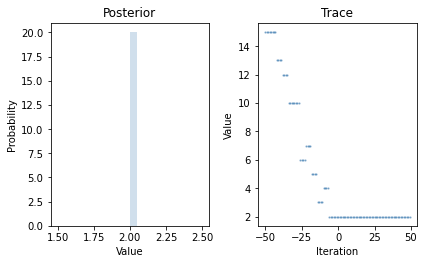

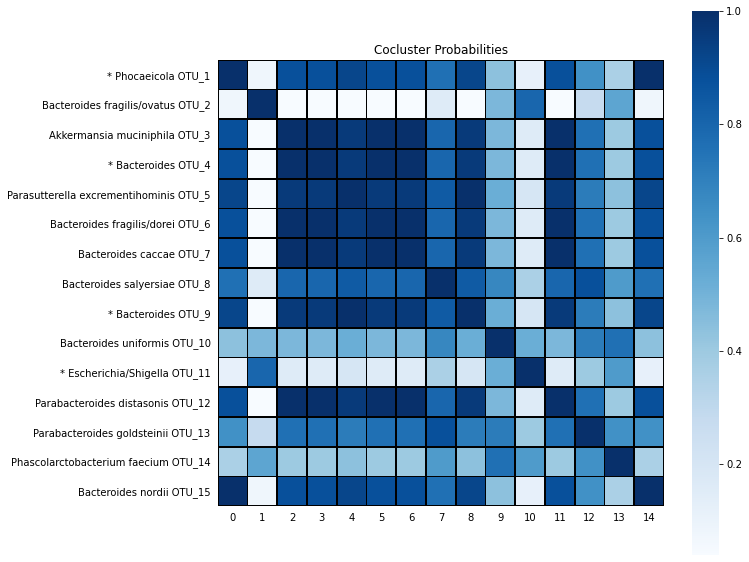

In [67]:
clustering = mcmc_healthy0.graph[STRNAMES.CLUSTERING_OBJ]
taxas = mcmc_healthy0.graph.data.taxas

md2.visualization.render_trace(clustering.n_clusters)
order = []
for i, cluster in enumerate(clustering):
    print('Cluster {}'.format(i))
    for oidx in cluster:
        print('\t', md2.taxaname_for_paper(taxas[oidx], taxas))

coclusters = md2.summary(mcmc_healthy0.graph[STRNAMES.CLUSTERING_OBJ].coclusters)['mean']
md2.visualization.render_cocluster_proportions(coclusters, taxas=h_toy.taxas,
    yticklabels='%(paperformat)s', title='Cocluster Probabilities')
plt.show()

# Calculating  $\hat{r}$

In [68]:
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, data_seed=100, init_seed=100,
    burnin=50, n_samples=100, negbin_a0=a0, 
    negbin_a1=a1, checkpoint=50)
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'
mcmc_healthy1 = md2.initialize_graph(params=params, graph_name=h_toy.name, subjset=h_toy)
mcmc_healthy1 = md2.run_graph(mcmc_healthy1, crash_if_error=True)


INFO:base.2535: max_value found: 551243918704.4608, scaling_factor: 1.8140789695244354e-10
INFO:run.83: Normalizing abundances for a max value of 100. Normalization constant: 1.8141E-10
INFO:run.250: There are 297 qPCR measurements for 3 buckets. Each bucket is 99 measurements long
INFO:run.285: Initializing Filtering
INFO:posterior.2649: Setting up the essential timepoints
INFO:posterior.2662: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.285: Initializing Zero inflation
INFO:design_matrices.846: Initializing LHS vector
INFO:design_matrices.1011: Initializing growth design matrix
INFO:design_matrices.939: Initializing self-intera

INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Vancomycin
INFO:run.369: 		value: {2134605562768: 0, 2135212104952: 0, 2135216200728: 0, 2135205739656: 0, 2135274851912: 0, 2135253267512: 0, 2135199251872: 0, 2135206007752: 0, 2135259029064: 0, 2135274675504: 0, 2134604827280: 0, 2134604825432: 0, 2134604827336: 0, 2135215970848: 0, 2135201675136: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Gentamicin
INFO:run.369: 		value: {2134605562768: 0, 2135212104952: 0, 2135216200728: 0, 2135205739656: 0, 2135274851912: 0, 2135253267512: 0, 2135199251872: 0, 2135206007752: 0, 2135259029064: 0, 2135274675504: 0, 2134604827280: 0, 2134604825432: 0, 2134604827336: 0, 2135215970848: 0, 2135201675136: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.371: Perturbation prior variances:
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:r

INFO:inference.436: Cluster interaction probability: 0.6665278855317484
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.027998924255371094s
perturbation High Fat Diet (7/15): [ True False  True False False  True False  True False  True  True  True False False False]
perturbation Vancomycin (11/15): [ True  True False False  True  True False  True  True False  True  True  True  True  True]
perturbation Gentamicin (14/15): [ True  True  True  True  True  True  True  True  True  True  True  True False  True  True]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.40954325958076204
	perturbation Vancomycin: 0.6541798484844479
	perturbation Gentamicin: 0.7491910824711586
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.03237451 1.25930001 0.76385501 1.05156309 0.707293

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.37483288236449785
	perturbation Vancomycin: 0.36789937892641905
	perturbation Gentamicin: 0.20357257497278855
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[1.98510289e-02 1.02169640e+00 7.45863085e-01 9.21051894e-01 7.06720570e-01 3.55021379e-01 3.21979763e-01 1.40154342e-01 2.91281081e-04 5.39030243e-01 8.70189236e-02 2.40001173e-01 7.71675881e-01 1.13644204e+00 5.51036581e-02]
Self Interactions:
[2.97290543e-02 1.52593411e-01 7.47824506e-02 6.58763154e-02 1.89322695e-01 1.17784095e+01 3.74240960e-01 2.58201511e+00 9.05693978e-03 4.59507787e-01 1.81829758e-01 2.70024719e-02 8.28534145e-01 9.32668638e-01 1.69112399e-01]
Interactions:
[-0.19925537 -0.14311106 -0.23643709 -0.24985086  0.52336431  6.08990686 -0.19630516 -0.16577901  1.70481544 -0.96165819 

INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5499.1104199777765
	perturbation Vancomycin: 3098.704782765603
	perturbation Gentamicin: 5241.898970454768
INFO:inference.436: Process Variance parameter: 4.388668125358047, empirical_variance: 4.45214
INFO:inference.436: Filtering: no-mp - Time: 0.2390, Acc: [0.588, 0.632, 0.610, 0.596], data/sec: 18828.48
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 2134605562768
	members: ['OTU_1']
	size: 1
Cluster 2135212104952
	members: ['OTU_2']
	size: 1
Cluster 2135216200728
	members: ['OTU_3']
	size: 1
Cluster 2135205739656
	members: ['OTU_4']
	size: 1
Cluster 2135274851912
	members: ['OTU_5']
	size: 1
Cluster 2135253267512
	members: ['OTU_6']
	size: 1
Cluster 2135199251872
	members: ['OTU_7']
	size: 1
Cluster 2135206007752
	members: ['OTU_8']
	siz

INFO:inference.436: Cluster interaction probability: 0.10242331259403283
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.01799917221069336s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (0/15): [False False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.027907145843333647
	perturbation Vancomycin: 0.027899417655079733
	perturbation Gentamicin: 0.00866592189100066
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[3.26595033e-01 5.98381380e-01 4.20059311e-01 3.732

INFO:inference.436: Process Variance parameter: 4.226058479807072, empirical_variance: 4.40168
INFO:inference.436: Filtering: no-mp - Time: 0.2320, Acc: [0.587, 0.628, 0.612, 0.606], data/sec: 19399.27
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 2135196081848
	members: ['OTU_12']
	size: 1
Cluster 2134604825432
	members: ['OTU_1']
	size: 1
Cluster 2135199070136
	members: ['OTU_5']
	size: 1
Cluster 2135213046976
	members: ['OTU_4']
	size: 1
Cluster 2135211833832
	members: ['OTU_7']
	size: 1
Cluster 2135259045840
	members: ['OTU_15']
	size: 1
Cluster 2135215702592
	members: ['OTU_14']
	size: 1
Cluster 2135205739656
	members: ['OTU_9']
	size: 1
Cluster 2135274676120
	members: ['OTU_11']
	size: 1
Cluster 2135252789176
	members: ['OTU_10']
	size: 1
Cluster 2135274675504
	members: ['OTU_2']
	size: 1
Cluster 2135211717800
	members: ['OTU_13']
	size: 1
Cluster 2135202220016
	members: ['OTU_6']
	size: 1


INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.002698469097430458
	perturbation Vancomycin: 0.10485882348037813
	perturbation Gentamicin: 0.005339313380140245
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.28702352 0.43091605 0.29748463 0.12759889 0.24390838 0.05431792 0.3847743  0.16502312 0.21185806 0.33322865 0.05135955 0.18693995 0.71538497 0.52521522 0.02998761]
Self Interactions:
[0.16069228 0.1029128  0.06381219 0.04413511 0.45057981 4.82209806 0.17632668 0.26922801 0.0345839  0.25161174 0.03163206 0.14765602 0.81765902 1.39044451 0.01184843]
Interactions:
[ 0.61105832  1.13620364 -0.42525593]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal pr

INFO:inference.436: Clustering concentration parameter: 80710.29998437029
INFO:inference.427: 

Inference iteration 10/100, time: 0.32199978828430176
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3020361366575077, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 9.423961495655274
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3336.4439497097505
	perturbation Vancomycin: 1211.2405656383376
	perturbation Gentamicin: 940.4176416460793
INFO:inference.436: Process Variance parameter: 4.160626957596797, empirical_variance: 4.24101
INFO:inference.436: Filtering: no-mp - Time: 0.2240, Acc: [0.616, 0.628, 0.604, 0.607], data/sec: 20092.13
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 2135200908008
	members: ['OTU_3']
	size: 1
Cluster 2135212072856
	members: ['OTU_12']
	size: 1
Cluster 2135255835200
	members: ['OTU_11']

INFO:inference.436: Cluster interaction probability: 0.0013113344580966476
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.011000871658325195s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [False  True False False False False False False False False False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0559749902380759
	perturbation Vancomycin: 0.05583876166185385
	perturbation Gentamicin: 0.00022309813887594844
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.37885667 0.50320083 0.36264781 0.39597022 0.44703495 0.04116791

INFO:inference.436: Clustering concentration parameter: 40.66741976639611
INFO:inference.427: 

Inference iteration 15/100, time: 0.301572322845459
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fals

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2825643373138257, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 42.90945889317026
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2124.383440446706
	perturbation Vancomycin: 596.5655056309836
	perturbation Gentamicin: 1202.4175903340833
INFO:inference.436: Process Variance parameter: 3.962381073326584, empirical_variance: 4.10183
INFO:inference.436: Filtering: no-mp - Time: 0.2195, Acc: [0.612, 0.611, 0.615, 0.604], data/sec: 20500.46
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 2135212072856
	members: ['OTU_10']
	size: 1
Cluster 2135201327928
	members: ['OTU_6']
	size: 1
Cluster 2135237672464
	members: ['OTU_1']
	

INFO:inference.436: Cluster interaction probability: 0.0014522416609546842
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.01300191879272461s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False False False False False False False False False False False False False  True False]
perturbation Gentamicin (2/15): [False False  True False False False  True False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0037559483205015687
	perturbation Vancomycin: 0.07805593980747412
	perturbation Gentamicin: 0.18098086405594796
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17289441 0.43057988 0.33758861 0.26105306 0.82

INFO:inference.436: Clustering concentration parameter: 2178.1194900362016
INFO:inference.427: 

Inference iteration 20/100, time: 0.32396912574768066
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False F

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.01961066 0.31669762 0.36938161 0.43080594 0.30398231 0.08119051 0.17044439 0.18729653 0.13193377 0.10401536 0.03825381 0.27321963 0.38739342 0.98400522 0.25392556]
Self Interactions:
[0.17846026 0.14433813 0.05204437 0.15594335 0.32034646 5.24041496 0.27998195 5.7561615  0.0786372  0.32167279 0.49134538 0.3926321  0.67061823 0.88780027 0.15673747]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.547220939604374
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -37.718692879694345
	perturbation Vancomycin: 105.42540820712219
	perturbation Gentamicin: 24.13988555581796
INFO:

INFO:inference.436: Cluster interaction probability: 0.00045565175482171924
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.012000083923339844s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [ True False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0022599601253513214
	perturbation Vancomycin: 0.12883347348463453
	perturbation Gentamicin: 0.018287367755335092
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.36640868 0.58348108 0.40575026 0.27686872 0

INFO:inference.436: Clustering concentration parameter: 403.49487953892304
INFO:posterior.1850: 0/15 - 7
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 10
INFO:posterior.1850: 2/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 3/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 11
INFO:posterior.1850: 5/15 - 12
INFO:posterior.1850: 6/15 - 14
INFO:posterior.1850: 7/15 - 4
INFO:posterior.1850: 8/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 1
INFO:posterior.1850: 10/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 2
INFO:posterior.1850: 12/15 - 8
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 5
INFO:inference.427: 

Inference iteration 25/100, time: 0.8165135383605957
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False Fal

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.11115746 0.61096683 0.06067293 0.44481626 0.49378921 0.08617467 0.35513545 0.11446226 0.18828696 0.33160229 0.02986427 0.64748371 0.66192427 0.72078155 0.14673629]
Self Interactions:
[0.1268974  0.14786174 0.03321841 0.08255235 0.25570639 6.42214289 0.3003548  7.43026068 0.07960227 0.33540411 0.4376129  0.63957415 0.80861474 0.66709507 0.21048357]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [90.5080963]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 23.495585541167333
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 68.27308850324158
	perturbation Vancomycin: 66.64370177474848
	perturbation Gentamicin: -54.31081268097

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -7.9570266020608305
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -51.59198784880714
	perturbation Vancomycin: 121.33430208292678
	perturbation Gentamicin: -29.996005037736396
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.0501814426147447, Acceptance rate: 0.9655172413793104
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1574785696807272, Acceptance rate: 0.9655172413793104
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.487542367608958
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 553.6703422348183
	perturbation Vancomycin: 4506

INFO:inference.436: Cluster interaction probability: 0.015010027471624476
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010998010635375977s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False False False False False False False  True False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.07119184313397903
	perturbation Vancomycin: 0.05104469767408726
	perturbation Gentamicin: 0.02896583754211009
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.27752591 0.75019414 0.28130813 0.2170221  0.5720

INFO:inference.436: Clustering concentration parameter: 1410.7776081629972
INFO:posterior.1850: 0/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 4
INFO:posterior.1850: 2/15 - 6
INFO:posterior.1850: 3/15 - 11
INFO:posterior.1850: 4/15 - 1
INFO:posterior.1850: 5/15 - 5
INFO:posterior.1850: 6/15 - 9
INFO:posterior.1850: 7/15 - 8
INFO:posterior.1850: 8/15 - 2
INFO:posterior.1850: 9/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 10/15 - 10
INFO:posterior.1850: 11/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 7
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 33/100, time: 0.8455085754394531
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False Fals

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -17.711669725131316
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 172.70632098514707
	perturbation Vancomycin: 47.689900105766434
	perturbation Gentamicin: 11.03542381774768
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.9645009861035916, Acceptance rate: 0.9705882352941176
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2460703985869695, Acceptance rate: 0.9705882352941176
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 83.38571793414312
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 131653.2352372517
	perturbation Vancomycin: 4846.3

INFO:inference.436: Cluster interaction probability: 0.0005917937624236335
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010999202728271484s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [False False False False False False False False False  True False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.04837272097937405
	perturbation Vancomycin: 0.043311167119799814
	perturbation Gentamicin: 0.0037646147843683367
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.34486964 0.4620136  0.19090598 0.60987653 0.75436551 0.1632253

INFO:inference.436: Process Variance parameter: 3.3837339421066375, empirical_variance: 3.47932
INFO:inference.436: Filtering: no-mp - Time: 0.2440, Acc: [0.583, 0.627, 0.612, 0.620], data/sec: 18440.81
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 2135201428480
	members: ['OTU_2']
	size: 1
Cluster 2135211959296
	members: ['OTU_5']
	size: 1
Cluster 2134605545544
	members: ['OTU_7']
	size: 1
Cluster 2135215189296
	members: ['OTU_14']
	size: 1
Cluster 2135259029064
	members: ['OTU_4']
	size: 1
Cluster 2135196120456
	members: ['OTU_9']
	size: 1
Cluster 2135211959968
	members: ['OTU_10']
	size: 1
Cluster 2135201387856
	members: ['OTU_1']
	size: 1
Cluster 2135245431752
	members: ['OTU_12']
	size: 1
Cluster 2135215186720
	members: ['OTU_13']
	size: 1
Cluster 2134604827336
	members: ['OTU_15']
	size: 1
Cluster 2135201428760
	members: ['OTU_8']
	size: 1
Cluster 2135258857600
	members: ['OTU_3']
	size: 1


INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08378874168713732
	perturbation Vancomycin: 0.025739883549030187
	perturbation Gentamicin: 0.008411261016086812
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.1648703  0.39582458 0.13242466 0.28362965 0.64801063 0.10279713 0.22854898 0.1603705  0.06287532 0.01572893 0.01717548 0.35369235 0.80062156 1.11858301 0.1547843 ]
Self Interactions:
[0.23243306 0.13476864 0.01842199 0.03625849 0.35513902 6.71258889 0.30616472 3.09287884 0.08215762 0.32899918 0.46076777 0.5628522  0.90437192 0.81546064 0.28368106]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [168.29394058]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction 

INFO:inference.436: Clustering concentration parameter: 190.09493546075257
INFO:posterior.1850: 0/15 - 12
INFO:posterior.1850: 1/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 - 2
INFO:posterior.1850: 3/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 11
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 5/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 5
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 7/15 - 9
INFO:posterior.1850: 8/15 - 10
INFO:posterior.1850: 9/15 - 7
INFO:posterior.1850: 10/15 - 4
INFO:posterior.1850: 11/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 0
INFO:posterior.1850: 13/15 - 8
INFO:posterior.1850: 14/15 - 13
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 41/100, time: 0.8089742660522461
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False Fal

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17199245 0.48270313 0.25840973 0.24723123 0.64580311 0.20572021 0.11141325 0.20237768 0.24860071 0.12127491 0.02205837 0.25552303 0.52200796 0.72520245 0.24129519]
Self Interactions:
[0.19882148 0.12855259 0.05697957 0.09599876 0.2228606  9.9348063  0.25706366 7.12212101 0.13683169 0.38442425 0.45235553 0.34005212 0.74416673 0.81287566 0.1765187 ]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [144.90624744]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -5.673664910112313
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 24.44940857413077
	perturbation Vancomycin: 83.01079193961073
	perturbation Gentamicin: -25.973837326

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -6.872087055024944
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -212.13962663292585
	perturbation Vancomycin: 135.64755036015802
	perturbation Gentamicin: 60.14142695716129
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.562305155981364, Acceptance rate: 0.9777777777777777
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5779819333591089, Acceptance rate: 0.9777777777777777
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.2102028563500722
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2468.623169905419
	perturbation Vancomycin: 2157.8

INFO:inference.436: Cluster interaction probability: 0.009482248632786116
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.013002634048461914s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False  True False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.015291947668070138
	perturbation Vancomycin: 0.05345371809405318
	perturbation Gentamicin: 0.04679275020761573
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.00846442 0.31699864 0.07463039 0.26013053 0.271

INFO:inference.436: Clustering concentration parameter: 684.6860923835567
INFO:posterior.1850: 0/15 - 10
INFO:posterior.1850: 1/15 - 11
INFO:posterior.1850: 2/15 - 4
INFO:posterior.1850: 3/15 - 5
INFO:posterior.1850: 4/15 - 6
INFO:posterior.1850: 5/15 - 7
INFO:posterior.1850: 6/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 7/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 8/15 - 1
INFO:posterior.1850: 9/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 10/15 - 9
INFO:posterior.1850: 11/15 - 3
INFO:posterior.1850: 12/15 - 8
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 0
INFO:posterior.1850: 14/15 - 12
INFO:inference.427: 

Inference iteration 49/100, time: 0.8549988269805908
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False F

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 9.789400844415487
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 97.91009200806958
	perturbation Vancomycin: 161.30204863799773
	perturbation Gentamicin: -67.69090084932976
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3518228281745865, Acceptance rate: 0.98
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6903283748184476, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 25.33024299437184
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1654.7288664940916
	perturbation Vancomycin: 5869.570618892774
	perturbation Gen

INFO:inference.436: Cluster interaction probability: 0.037087557476175134
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.012990474700927734s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (1/14): [ True False False False False False False False False False False False False False]
perturbation Gentamicin (0/14): [False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0023680488168232525
	perturbation Vancomycin: 0.07119412276301118
	perturbation Gentamicin: 0.08711943670068743
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.04670617 0.27706448 0.18772047 0.64540642 0.66222455 0.05031192 

INFO:inference.436: Process Variance parameter: 3.1188168766152793, empirical_variance: 3.04581
INFO:inference.436: Filtering: no-mp - Time: 0.2260, Acc: [0.618, 0.622, 0.592, 0.580], data/sec: 19911.39
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 2135234853800
	members: ['OTU_14']
	size: 1
Cluster 2135254871680
	members: ['OTU_1', 'OTU_15']
	size: 2
Cluster 2135215703600
	members: ['OTU_6', 'OTU_9', 'OTU_12']
	size: 3
Cluster 2135200940272
	members: ['OTU_3']
	size: 1
Cluster 2135274624112
	members: ['OTU_5']
	size: 1
Cluster 2135213803504
	members: ['OTU_8']
	size: 1
Cluster 2135245543576
	members: ['OTU_2']
	size: 1
Cluster 2135201390720
	members: ['OTU_4']
	size: 1
Cluster 2135215970848
	members: ['OTU_10']
	size: 1
Cluster 2135201392960
	members: ['OTU_13']
	size: 1
Cluster 2135251607736
	members: ['OTU_7']
	size: 1
Cluster 2135251313104
	members: ['OTU_11']
	size: 1
no mp - Total time: 0.4

INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -108.10135562885765
	perturbation Vancomycin: 79.06844145100044
	perturbation Gentamicin: -59.085267340525036
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7439708551528694, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6447129670508083, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.973626494245298
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1263.1512907463875
	perturbation Vancomycin: 22099.836392311863
	perturbation Gentamicin: 2294.4974855028668
INFO:inference.436: Process Variance parameter: 3.0810819322633245, empir

INFO:inference.436: Cluster interaction probability: 0.01571930330523468
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010998964309692383s
perturbation High Fat Diet (0/9): [False False False False False False False False False]
perturbation Vancomycin (1/9): [False False False False False False  True False False]
perturbation Gentamicin (0/9): [False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.023818289874578444
	perturbation Vancomycin: 0.10928128527833296
	perturbation Gentamicin: 9.396364332889766e-05
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.18356233 0.26829379 0.3875786  0.13251487 0.64370628 0.29062805 0.14478007 0.01295856 0.44257562 0.10244551 0.01458963 0.62045359 0.97490312 0.66056446 0.269

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.2292216482550828
	perturbation Vancomycin: 0.1005143440457669
	perturbation Gentamicin: 0.009481071610908528
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.0541793  0.21780288 0.35814555 0.50415545 0.64934852 0.20558687 0.2471865  0.21706501 0.35856665 0.08604369 0.01605896 0.56572004 0.81445264 0.55300458 0.35424036]
Self Interactions:
[ 0.1595729   0.07628231  0.02064159  0.13755532  0.44303996  5.98782308  0.35293561 11.71266398  0.14969002  0.42573512  0.5335982   0.62463976  0.57647114  0.75446686  0.14988991]
Interactions:
[-0.07693759]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [224.54241787]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal pr

INFO:inference.436: Cluster interaction probability: 0.03710688979326142
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008998632431030273s
perturbation High Fat Diet (1/9): [False False False False False False  True False False]
perturbation Vancomycin (2/9): [False False False False  True False False False  True]
perturbation Gentamicin (3/9): [False False  True False False  True  True False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.20395955063940313
	perturbation Vancomycin: 0.26607728481213894
	perturbation Gentamicin: 0.2407408698506996
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.32030134 0.29540556 0.19675106 0.44961518 0.85714015 0.05008102 0.17751614 0.03215944 0.59839857 0.33325702 0.01733552 0.79294985 0.57760581 0.54608214 0.1648408

INFO:inference.436: Cluster interaction probability: 0.01439683547341856
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008980035781860352s
perturbation High Fat Diet (0/9): [False False False False False False False False False]
perturbation Vancomycin (1/9): [False False False False False  True False False False]
perturbation Gentamicin (2/9): [False False  True False False False False False  True]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.07409701537383274
	perturbation Vancomycin: 0.03880993004032056
	perturbation Gentamicin: 0.0285559467741167
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.16060111 0.65853082 0.47398844 0.6497975  0.70296873 0.00722013 0.4171043  0.00531984 0.31242587 0.23971999 0.01900658 0.43182306 0.72927321 0.36271137 0.3829973

INFO:inference.436: Cluster interaction probability: 0.04095301997356996
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.009999513626098633s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (0/7): [False False False False False False False]
perturbation Gentamicin (2/7): [False False  True False  True False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.13606043972383364
	perturbation Vancomycin: 0.09802297200946682
	perturbation Gentamicin: 0.22622236660190795
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.28752944 0.56817055 0.3582915  0.40597978 0.69708863 0.13222641 0.39481375 0.27844585 0.56979909 0.33123909 0.02049725 0.56828204 0.79855649 0.74585356 0.29676708]
Self Interactions:
[0.17071368 0

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -0.4469692136375687
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 66.54987896706692
	perturbation Vancomycin: 125.07460127365117
	perturbation Gentamicin: 54.82713504264198
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7858231857351933, Acceptance rate: 0.98
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7191065167230628, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.660196634319956
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 584.4165406105233
	perturbation Vancomycin: 13529.26410576684
	perturbation Gen

INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.184863515048567, Acceptance rate: 0.98
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7166541543547503, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.450170266217799
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4370.743701963426
	perturbation Vancomycin: 10520.594937633063
	perturbation Gentamicin: 2618.9459656406443
INFO:inference.436: Process Variance parameter: 2.695537803650422, empirical_variance: 2.73085
INFO:inference.436: Filtering: no-mp - Time: 0.2300, Acc: [0.608, 0.612, 0.586, 0.596], data/sec: 19565.18
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluste

INFO:inference.436: Process Variance parameter: 2.6417640639511606, empirical_variance: 2.70423
INFO:inference.436: Filtering: no-mp - Time: 0.2365, Acc: [0.629, 0.622, 0.626, 0.618], data/sec: 19026.25
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 2135215703600
	members: ['OTU_4', 'OTU_1', 'OTU_9', 'OTU_12', 'OTU_13', 'OTU_15']
	size: 6
Cluster 2135251607736
	members: ['OTU_2', 'OTU_7']
	size: 2
Cluster 2135200942904
	members: ['OTU_3', 'OTU_5']
	size: 2
Cluster 2135254809624
	members: ['OTU_6', 'OTU_8']
	size: 2
Cluster 2135333028080
	members: ['OTU_11']
	size: 1
Cluster 2135201026960
	members: ['OTU_10']
	size: 1
Cluster 2135257955072
	members: ['OTU_14']
	size: 1
no mp - Total time: 0.30118441581726074
INFO:inference.436: Clustering concentration parameter: 7.907920688243114
INFO:inference.427: 

Inference iteration 72/100, time: 0.2819967269897461
INFO:inference.436: Cluster interaction indic

INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 7
Cluster 2135215703600
	members: ['OTU_4', 'OTU_1', 'OTU_9', 'OTU_12', 'OTU_15', 'OTU_13']
	size: 6
Cluster 2135251607736
	members: ['OTU_2', 'OTU_7']
	size: 2
Cluster 2135200942904
	members: ['OTU_3', 'OTU_5']
	size: 2
Cluster 2135254809624
	members: ['OTU_6']
	size: 1
Cluster 2135212189232
	members: ['OTU_10']
	size: 1
Cluster 2135254807888
	members: ['OTU_11', 'OTU_14']
	size: 2
Cluster 2135212104952
	members: ['OTU_8']
	size: 1
no mp - Total time: 0.30497217178344727
INFO:inference.436: Clustering concentration parameter: 4.546266647220817
INFO:inference.427: 

Inference iteration 74/100, time: 0.3150038719177246
INFO:inference.436: Cluster interaction indicator parameter: [ True False  True False False False False False False False False False False False False False  True False False False False False False False False False False  True False False False 

INFO:inference.427: 

Inference iteration 76/100, time: 0.33300089836120605
INFO:inference.436: Cluster interaction indicator parameter: [ True False  True False False  True False False False False False False False False  True False  True False False False False False False False False False False  True False False False False False  True False False False False False False False False]
total time: 0.024994850158691406, n_interactions: 7/42, 0.17
INFO:inference.436: Cluster interaction probability: 0.2653375254958733
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.009999752044677734s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [False False False False False False  True]
perturbation Gentamicin (2/7): [False False False False  True False  True]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	

INFO:inference.436: Cluster interaction indicator parameter: [ True False False False False  True False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False  True False False False  True False False]
total time: 0.024999141693115234, n_interactions: 5/42, 0.12
INFO:inference.436: Cluster interaction probability: 0.16615746549498686
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.01099848747253418s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [False False False False  True False False]
perturbation Gentamicin (2/7): [False False False False False  True  True]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.1286502923515261
	perturbation Vancomycin: 0.1

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 1.3385164692919681e-06
	perturbation Vancomycin: 0.0608234720413838
	perturbation Gentamicin: 0.28102526291646573
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.35826872 0.47887612 0.42109701 0.46148078 0.75215145 0.095788   0.06433084 0.10012262 0.16263426 0.13257118 0.17768252 0.51910686 0.55902459 0.69392862 0.36086911]
Self Interactions:
[0.14917771 0.14084988 0.05158191 0.04654559 0.26850142 5.23311361 0.27957741 6.05417558 0.04000671 0.30589572 0.32329995 0.54971304 0.40230979 0.81300567 0.17532477]
Interactions:
[-0.06572978  2.88903527  2.00018654 -0.01657464 -0.07306566  3.19434406]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [13.68738129]
	 perturbation Gentamicin: [-5.9075

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 3.274480539460115
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 140.80717813372877
	perturbation Vancomycin: 61.713798037017995
	perturbation Gentamicin: -155.70673561567364
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3394674681097214, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.41967351086543303, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.986890272867261
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3843.289738981062
	perturbation Vancomycin: 1631.930100080438
	perturbation G

INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 2135215703600
	members: ['OTU_1', 'OTU_3', 'OTU_4', 'OTU_5', 'OTU_9', 'OTU_13', 'OTU_12', 'OTU_15']
	size: 8
Cluster 2135251607736
	members: ['OTU_2', 'OTU_7', 'OTU_8', 'OTU_14']
	size: 4
Cluster 2135204397240
	members: ['OTU_11']
	size: 1
Cluster 2135257923424
	members: ['OTU_10']
	size: 1
Cluster 2135254809624
	members: ['OTU_6']
	size: 1
no mp - Total time: 0.2739992141723633
INFO:inference.436: Clustering concentration parameter: 1.0513763167757917
INFO:posterior.1850: 0/15 - 14
INFO:posterior.1850: 1/15 - 6
INFO:posterior.1850: 2/15 - 4
INFO:posterior.1850: 3/15 - 7
INFO:posterior.1850: 4/15 - 12
INFO:posterior.1850: 5/15 - 11
INFO:posterior.1850: 6/15 - 0
INFO:posterior.1850: 7/15 - 8
INFO:posterior.1850: 8/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 2
INFO:posterior.1850: 10/15 - 1
INFO:posterior.1965: cluster changed

INFO:inference.427: 

Inference iteration 87/100, time: 0.30100417137145996
INFO:inference.436: Cluster interaction indicator parameter: [ True  True  True  True False False  True False False False False False False False False False False  True False  True]
total time: 0.01299905776977539, n_interactions: 7/20, 0.35
INFO:inference.436: Cluster interaction probability: 0.28033892532744104
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010000228881835938s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [False False False False  True]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.001321844107820786
	perturbation Vancomycin: 0.08010441052185369
	perturbation Gentamicin: 0.056739026786857535
INFO:inference.436: Logist

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.10896612564658859
	perturbation Vancomycin: 0.2265032063309113
	perturbation Gentamicin: 0.04439749207047483
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.39631141 0.57286616 0.38144214 0.66801024 0.89443599 0.03823547 0.28765782 0.14582062 0.37210012 0.02944134 0.12628534 0.66617532 0.69217753 0.50606573 0.40103166]
Self Interactions:
[9.19889539e-02 1.20311102e-01 9.00101721e-03 7.03882212e-02 3.26730895e-01 5.30710139e+00 3.44288627e-01 1.61424801e+01 1.13765073e-02 1.43329406e-01 4.27895909e-01 6.29351655e-01 4.86022149e-01 7.63184707e-01 8.24020605e-02]
Interactions:
[-0.1392028   3.98891722 -0.08370816  6.28532231  0.96636993  3.62881734]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vanc

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.871209516689767
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -104.72446820043217
	perturbation Vancomycin: 33.19448732605012
	perturbation Gentamicin: 10.976320922489833
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.089848349943454, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5449518088580586, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.7271555271794354
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4061.048164099494
	perturbation Vancomycin: 400.74198891071546
	perturbation Ge

INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3005.3543655701606
	perturbation Vancomycin: 661.5933564696045
	perturbation Gentamicin: 1584.6903183226443
INFO:inference.436: Process Variance parameter: 2.6246233487768897, empirical_variance: 2.64076
INFO:inference.436: Filtering: no-mp - Time: 0.2230, Acc: [0.598, 0.635, 0.604, 0.615], data/sec: 20182.43
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 2135215703600
	members: ['OTU_4', 'OTU_5', 'OTU_12', 'OTU_1', 'OTU_9', 'OTU_13', 'OTU_15', 'OTU_3']
	size: 8
Cluster 2135251607736
	members: ['OTU_10', 'OTU_2', 'OTU_7', 'OTU_14']
	size: 4
Cluster 2135212104952
	members: ['OTU_8']
	size: 1
Cluster 2135253137560
	members: ['OTU_11']
	size: 1
Cluster 2135204398024
	members: ['OTU_6']
	size: 1
no mp - Total time: 0.24599957466125488
INFO:infere

INFO:inference.427: 

Inference iteration 96/100, time: 0.2719700336456299
INFO:inference.436: Cluster interaction indicator parameter: [ True  True  True  True False  True False  True False False False  True False False  True False False False False False]
total time: 0.014995813369750977, n_interactions: 8/20, 0.40
INFO:inference.436: Cluster interaction probability: 0.4500678891722784
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.012014389038085938s
perturbation High Fat Diet (0/5): [False False False False False]
perturbation Vancomycin (1/5): [False False False  True False]
perturbation Gentamicin (0/5): [False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.00902606516069652
	perturbation Vancomycin: 0.17829702943534392
	perturbation Gentamicin: 0.04407068632780207
INFO:inference.436: Logistic 

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03918292317608243
	perturbation Vancomycin: 0.06794235675756238
	perturbation Gentamicin: 0.13886268887050537
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.34101814 0.41953329 0.3024036  0.60188526 0.77672325 0.01205296 0.14315866 0.15352684 0.32360142 0.09974666 0.05597863 0.73235827 0.64973457 0.58218751 0.35174127]
Self Interactions:
[ 0.10630299  0.17296729  0.03328213  0.09926033  0.16321873  4.60953795  0.36164243 10.08632073  0.06901995  0.30836288  0.36936205  0.62905038  0.53993317  0.51504026  0.07468956]
Interactions:
[-0.07437102 -0.05492339  4.74570035  4.18312585  1.00646129]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [55.0148825]
	 perturbation Gentamicin: []
INFO:

KeyError: "Unable to open object (object 'Clustering object (contains ability to change the cluster assignments)_n_clusters' doesn't exist)"

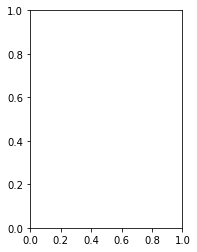

In [75]:
clustering = mcmc_healthy1.graph[STRNAMES.CLUSTERING_OBJ]
taxas = mcmc_healthy1.graph.data.taxas

md2.visualization.render_trace(clustering.n_clusters)
order = []
for i, cluster in enumerate(clustering):
    print('Cluster {}'.format(i))
    for oidx in cluster:
        print('\t', md2.taxaname_for_paper(taxas[oidx], taxas))

coclusters = md2.summary(mcmc_healthy1.graph[STRNAMES.CLUSTERING_OBJ].coclusters)['mean']
md2.visualization.render_cocluster_proportions(coclusters, taxas=h_toy.taxas,
                                                yticklabels='%(paperformat)s',
                                              title='Cocluster Probabilities')

bayes_factors = md2.generate_interation_bayes_factors_posthoc(mcmc_healthy1)
md2.visualization.render_bayes_factors(bf, taxas=taxas)

plt.show()

In [70]:
chains = [mcmc_healthy0, mcmc_healthy1]
start = 10
end = 20
vname = STRNAMES.GROWTH_VALUE

rhat = md2.pylab.inference.r_hat(chains, start=start, end=end, vname=vname)
print(rhat)

[0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833 0.9486833]


# Consensus clustering
Run the model with a fixed modules

In [71]:
# Use the clustering from a previous as the clustering assignment
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, data_seed=0, init_seed=0,
    burnin=50, n_samples=100, negbin_a0=a0, 
    negbin_a1=a1, checkpoint=50)

# Do not learn the clustering parameters
params.LEARN[STRNAMES.CLUSTERING] = False
params.LEARN[STRNAMES.CONCENTRATION] = False

# Set the initialization option for clustering
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'fixed-clustering'
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value'] = 'output/mdsine2/run2/mcmc.pkl'

mcmc = md2.initialize_graph(params=params, graph_name=h_toy.name, subjset=h_toy)
mcmc = md2.run_graph(mcmc, crash_if_error=True)

INFO:base.2535: max_value found: 551243918704.4608, scaling_factor: 1.8140789695244354e-10
INFO:run.83: Normalizing abundances for a max value of 100. Normalization constant: 1.8141E-10
INFO:run.250: There are 297 qPCR measurements for 3 buckets. Each bucket is 99 measurements long
INFO:run.285: Initializing Filtering
INFO:posterior.2649: Setting up the essential timepoints
INFO:posterior.2662: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.285: Initializing Zero inflation
INFO:design_matrices.846: Initializing LHS vector
INFO:design_matrices.1011: Initializing growth design matrix
INFO:design_matrices.939: Initializing self-intera

INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Vancomycin
INFO:run.369: 		value: {2135322861752: 0, 2135207185600: 0, 2135207185880: 0, 2135247028912: 0, 2135247030984: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Gentamicin
INFO:run.369: 		value: {2135322861752: 0, 2135207185600: 0, 2135207185880: 0, 2135247028912: 0, 2135247030984: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.371: Perturbation prior variances:
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.376: Perturbation indicators:
INFO:run.379: 	perturbation High Fat Diet: [False False False False False]
INFO:run.379: 	perturbation Vancomycin: [False False False False False]
INFO:run.379: 	perturbation Gentamicin: [False False False False False]
INFO:run.380: Perturbation indicator probabilit

INFO:inference.436: Process Variance parameter: 4.784824022358973, empirical_variance: 4.61364
INFO:inference.436: Filtering: parallel
INFO:inference.427: 

Inference iteration 2/100, time: 0.29668760299682617
INFO:inference.436: Cluster interaction indicator parameter: [False False  True  True False False False False False False  True False False False False False False False False  True]
total time: 0.019029617309570312, n_interactions: 4/20, 0.20
INFO:inference.436: Cluster interaction probability: 0.27512866365178695
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.007995843887329102s
perturbation High Fat Diet (1/5): [False False  True False False]
perturbation Vancomycin (1/5): [False  True False False False]
perturbation Gentamicin (4/5): [ True False  True  True  True]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.325

INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.783477719924947
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1653.9599247954652
	perturbation Vancomycin: 5335.976569940865
	perturbation Gentamicin: 1427.7829220025735
INFO:inference.436: Process Variance parameter: 4.482374076594264, empirical_variance: 4.55065
INFO:inference.436: Filtering: no-mp - Time: 0.2352, Acc: [0.565, 0.628, 0.621, 0.608], data/sec: 19134.56
INFO:posterior.6701: No columns, skipping
INFO:inference.427: 

Inference iteration 5/100, time: 0.2769489288330078
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False]
total time: 0.01031184196472168, n_interactions: 0/20, 0.00
INFO:inference.436: Cluster interaction probability: 0.000266775

INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 99.27808673847083
	perturbation Vancomycin: -83.38797510584916
	perturbation Gentamicin: -164.3503352000958
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.47483498962873694, Acceptance rate: 0.8571428571428571
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.21110493238193528, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.970701125108927
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2058.289285567028
	perturbation Vancomycin: 22227.828879198183
	perturbation Gentamicin: 576.1003714743473
INFO:inference.436: Process Variance parameter: 4.345914965633

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -6.605512372255257
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 7.747477676115999
	perturbation Vancomycin: 6.516404993562276
	perturbation Gentamicin: -13.079258089317673
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4783669888934758, Acceptance rate: 0.8
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.06720326217981018, Acceptance rate: 0.9
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.863541051521697
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 116408.1787169205
	perturbation Vancomycin: 1054.2318227987616
	perturbation Gen

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -5.485857208085932
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 45.96571175216298
	perturbation Vancomycin: 8.739141393728731
	perturbation Gentamicin: -242.48463114056386
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.985621582917232, Acceptance rate: 0.8461538461538461
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2877531540458342, Acceptance rate: 0.8461538461538461
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.5143235094621876
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2600.207388523923
	perturbation Vancomycin: 1344.25

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -22.13870690784807
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 9.784276998421294
	perturbation Vancomycin: 1.1191876031349537
	perturbation Gentamicin: -176.94647507175517
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.1347001755241797, Acceptance rate: 0.875
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.33640842437415874, Acceptance rate: 0.875
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.148825547552577
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6644.8564578876085
	perturbation Vancomycin: 1981.7504897874228
	perturbati

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -9.198865485124134
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -37.222935953466965
	perturbation Vancomycin: -10.379095408384202
	perturbation Gentamicin: -4.687955523749319
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2696859005656174, Acceptance rate: 0.8421052631578947
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4325740599001127, Acceptance rate: 0.8947368421052632
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 13.876931155694063
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 53198.67241291459
	perturbation Vancomycin: 339

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -0.08403275387510678
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 87.67267736904523
	perturbation Vancomycin: 22.034352464153926
	perturbation Gentamicin: -4.904969552919472
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.3955448999665299, Acceptance rate: 0.8181818181818182
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5613829078454263, Acceptance rate: 0.9090909090909091
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.2521776101001483
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 990.6870808760284
	perturbation Vancomycin: 3077

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.034467532297974
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -103.1051174886575
	perturbation Vancomycin: 33.65475196230621
	perturbation Gentamicin: 28.296116520912317
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.799347900702519, Acceptance rate: 0.8
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5663414313065263, Acceptance rate: 0.92
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.8745605880502623
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1801.0280135754467
	perturbation Vancomycin: 11409.665159856004
	perturbation Gen

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.795838836347549
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -131.09703704412124
	perturbation Vancomycin: -7.036912449178445
	perturbation Gentamicin: -171.19701640942213
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.3137472258036129, Acceptance rate: 0.8214285714285714
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.48742481727225184, Acceptance rate: 0.9285714285714286
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.0266373427861755
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 9218.220806805573
	perturbation Vancomycin: 585

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.2835687627545
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -57.88557618605281
	perturbation Vancomycin: -67.53769941593886
	perturbation Gentamicin: -53.74510647640315
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.22104171558757674, Acceptance rate: 0.8387096774193549
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5413717215586192, Acceptance rate: 0.9354838709677419
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.3747753383722388
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1028.3496162244533
	perturbation Vancomycin: 11792.

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.2178059320853203
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 87.34067505976851
	perturbation Vancomycin: 99.36177376587355
	perturbation Gentamicin: 9.598544803013857
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8323217944642076, Acceptance rate: 0.8529411764705882
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5455682960733563, Acceptance rate: 0.9411764705882353
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.551711663259597
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1847.2947432979056
	perturbation Vancomycin: 10294.96

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.8276347669572228
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 43.393896823028896
	perturbation Vancomycin: 36.157077172726
	perturbation Gentamicin: 32.519871468706526
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.166608578105183, Acceptance rate: 0.8108108108108109
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.42027215080801505, Acceptance rate: 0.9459459459459459
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 50.056246503297984
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2468.001251565458
	perturbation Vancomycin: 1311.545

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.3803285435571913
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -171.26293226824552
	perturbation Vancomycin: 98.42797721115564
	perturbation Gentamicin: 12.955452054621897
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.2273820002580074, Acceptance rate: 0.775
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.25638459437058847, Acceptance rate: 0.95
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.724897473386376
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6515.876937160449
	perturbation Vancomycin: 1188.0507184638896
	perturbation

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.0222337285628535
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 37.8804400269198
	perturbation Vancomycin: -15.391608897342863
	perturbation Gentamicin: -19.342403081508134
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.811799813685296, Acceptance rate: 0.7674418604651163
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.29106812006983196, Acceptance rate: 0.9534883720930233
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.9824087879764996
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 11188.951333454774
	perturbation Vancomycin: 3776

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.5742461183070948
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -76.83833192976775
	perturbation Vancomycin: 58.22724663169632
	perturbation Gentamicin: 181.0581760583611
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.6908795398287381, Acceptance rate: 0.782608695652174
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.130063037454931, Acceptance rate: 0.9565217391304348
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 8.629018905145015
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5399.086285215287
	perturbation Vancomycin: 1855.41159

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 3.6798996531835915
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -45.74123277216724
	perturbation Vancomycin: 32.40888937030275
	perturbation Gentamicin: -113.71374775650733
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4148838784729651, Acceptance rate: 0.7959183673469388
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.20864252345150094, Acceptance rate: 0.9591836734693877
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.851607878084538
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4118.674286503214
	perturbation Vancomycin: 5017.

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.2250039526793293
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 56.98443178000909
	perturbation Vancomycin: 151.03203111869885
	perturbation Gentamicin: 5.227895113430126
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.26099875075871254, Acceptance rate: 0.82
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2421881470053799, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.49812408855224
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 14635.531032363773
	perturbation Vancomycin: 984.2191586562456
	perturbation Gen

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.894075104646399
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -0.32088784349887406
	perturbation Vancomycin: 81.81258354277807
	perturbation Gentamicin: -73.94009462202818
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.7444731073313198, Acceptance rate: 0.82
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.24863193530458366, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.4026636890553434
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2309.0172920130785
	perturbation Vancomycin: 942.1600926978308
	perturbation

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.6448669983241395
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -124.1517341171064
	perturbation Vancomycin: 45.35465074585131
	perturbation Gentamicin: -2.0840849667597423
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.4600568462297452, Acceptance rate: 0.82
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.38677702353673865, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 6.828321237456656
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1345.319781477275
	perturbation Vancomycin: 2006.1352298633278
	perturbation 

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.3515208890869299
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -171.74326590687258
	perturbation Vancomycin: 152.05032198360004
	perturbation Gentamicin: -52.60001647683008
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.2006962950193593, Acceptance rate: 0.84
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.4377871757114625, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 6.185066672415005
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5590.637864131369
	perturbation Vancomycin: 2839.895525406097
	perturbation Ge

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.2793732724424174
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -23.267130682668725
	perturbation Vancomycin: 72.27902314889161
	perturbation Gentamicin: -138.84559854970144
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.837135559954383, Acceptance rate: 0.82
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6221111650844564, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.2886867530097366
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 45116.26596206974
	perturbation Vancomycin: 2566.681616687091
	perturbation Ge

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.12955010306494552
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 29.22827370423789
	perturbation Vancomycin: 95.95479839580092
	perturbation Gentamicin: -38.37113014624972
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.783343420631508, Acceptance rate: 0.82
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.5600582080990614, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.712503076678149
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 5046.912520456538
	perturbation Vancomycin: 956.2628223260151
	perturbation Genta

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.964223086504247
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 10.757246027763498
	perturbation Vancomycin: 66.70406480640384
	perturbation Gentamicin: 65.61451849865082
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8165197551085632, Acceptance rate: 0.86
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6803991001677528, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 9.709499472807613
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 15200.406256734423
	perturbation Vancomycin: 1623.1118561178112
	perturbation Gent

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.2891024785560645
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 11.777572136166281
	perturbation Vancomycin: 4.221745435132828
	perturbation Gentamicin: 144.3540015300983
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.5528165617291255, Acceptance rate: 0.86
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6770818867067984, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.8517230032311534
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1542.427882777991
	perturbation Vancomycin: 39998.64104573092
	perturbation Gent

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.0861970105834082
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 137.6324001360089
	perturbation Vancomycin: 113.5970702361063
	perturbation Gentamicin: 77.75666049215853
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.17172913869982426, Acceptance rate: 0.88
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.818537106950718, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.526664334086805
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 897.6398845294777
	perturbation Vancomycin: 1333.4202303545844
	perturbation Gent

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.6531990041281726
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 44.991607140173414
	perturbation Vancomycin: 47.603528423525766
	perturbation Gentamicin: -21.375974817460705
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.740608384705051, Acceptance rate: 0.88
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7816473497000068, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.191102989491022
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4657.887559660311
	perturbation Vancomycin: 6181.014470210887
	perturbation Ge

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.843474479805851
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -65.32710022059631
	perturbation Vancomycin: 51.04284275735383
	perturbation Gentamicin: -5.144842492437526
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8052596725365424, Acceptance rate: 0.88
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8265278797038547, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.468892434961187
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4122.78274738393
	perturbation Vancomycin: 696.1816609461981
	perturbation Genta

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.7268528938812047
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -138.4666127985463
	perturbation Vancomycin: 54.44519825474622
	perturbation Gentamicin: -19.095134267420057
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.5062442719945275, Acceptance rate: 0.9
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7388354835075728, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 12.76026222875699
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 926.3767620860168
	perturbation Vancomycin: 15393.186068651974
	perturbation Ge

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 3.261345905897848
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -74.97225119825444
	perturbation Vancomycin: 7.284506024080976
	perturbation Gentamicin: 49.98360279425572
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.3328259483822302, Acceptance rate: 0.92
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7810610162315411, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.609329032439453
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1454.676259145899
	perturbation Vancomycin: 814.6157120787844
	perturbation Genta

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -1.1218581319482022
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -7.608373647724817
	perturbation Vancomycin: 2.1518184291348597
	perturbation Gentamicin: -14.80198715987803
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.6184904759037577, Acceptance rate: 0.98
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8508524206810762, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.954446866677887
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1340.8333989257085
	perturbation Vancomycin: 1968.0073124041369
	perturbation

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.9211341887239015
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 32.21701228473006
	perturbation Vancomycin: 27.35924220446237
	perturbation Gentamicin: 109.17979231921164
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.08170811030348, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6745783772417566, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 3.1333007233621926
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8193.191531052877
	perturbation Vancomycin: 2121.7933848313733
	perturbation Gent

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.9420793489249274
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -212.12967913102338
	perturbation Vancomycin: -46.631892620434186
	perturbation Gentamicin: 27.52091680886898
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.6597177133217005, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8873030095224069, Acceptance rate: 0.98
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.81202434667694
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2328.616832321297
	perturbation Vancomycin: 8190.4036137281455
	perturbation G

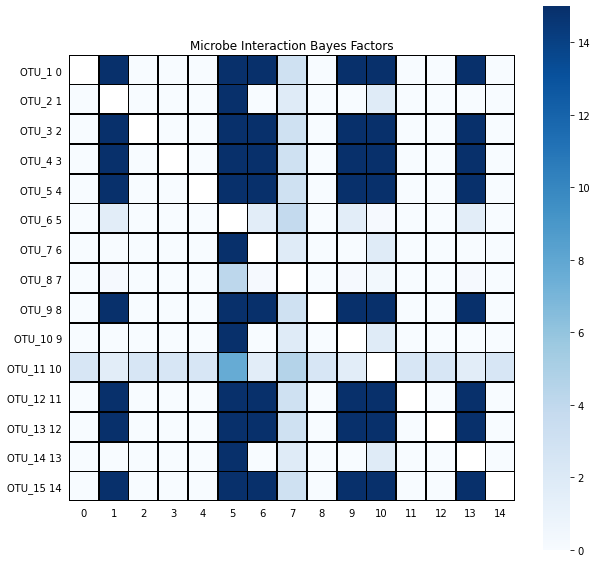

In [74]:
# Plot the posterior
taxas = mcmc.graph.data.taxas

bf = md2.generate_interation_bayes_factors_posthoc(mcmc)
md2.visualization.render_bayes_factors(bf, taxas=taxas)
plt.show()

# Cross validation

# Keystoneness and perturbation analysis